---

# 🧠 Giới thiệu

**Thành viên nhóm:**
- Nguyễn Hữu Đặng Nguyên - 23521045  
- Trần Vạn Tấn - 23521407  
- Trần Vinh Khánh - 23520726  

**Lớp:** CS116.P21.KHTN  

# 🏠 Dự đoán Giá Nhà Tương Lai tại London

📌 **Cuộc thi Kaggle**: [London House Price Prediction - Advanced Techniques](https://www.kaggle.com/competitions/london-house-price-prediction-advanced-techniques)  
📦 **Dataset**: [Link tải dữ liệu](https://www.kaggle.com/competitions/london-house-price-prediction-advanced-techniques/data)

---

Mục tiêu của bài toán là **dự đoán giá bán trong tương lai** của các bất động sản tại **London**, dựa trên một loạt đặc trưng sẵn có của từng ngôi nhà, cũng như thông tin về thời điểm bán.

**Bộ dữ liệu** bao gồm:
- Thông tin chi tiết về bất động sản:  
  `bedrooms`, `bathrooms`, `livingRooms`, `propertyType`, `floorAreaSqM`, `latitude`, `longitude`, `currentEnergyRating`, `tenure`, ...
- Dữ liệu thời gian:  
  `sale_month`, `sale_year`

Tập huấn luyện (`train.csv`) chứa nhãn `price`, còn tập kiểm tra (`test.csv`) là các giao dịch **tương lai (sau năm 2024)**, và mục tiêu là dự đoán `price` cho các bản ghi đó.

---

## 🎯 Nhiệm vụ

- Xây dựng mô hình **Machine Learning** hoặc **Deep Learning** có khả năng **dự đoán chính xác giá bán**.
- Mô hình cần khai thác hiệu quả:
  - Đặc trưng **cố định** của bất động sản
  - Các **xu hướng thị trường thay đổi theo thời gian**

---

## 📏 Độ đo đánh giá: **MAE - Mean Absolute Error**

> MAE = Trung bình giá trị tuyệt đối giữa giá trị dự đoán và giá trị thực tế.

---

## 🗓 Thời gian cuộc thi

- **Bắt đầu**: 12/2024  
- **Kết thúc**: 12/2025  

---

## 📤 Cách nộp bài & Tính điểm

- Nhận file `test.csv` chứa dữ liệu chưa có cột `price`.
- Dự đoán giá bán (`price`) cho mỗi dòng.
- Nộp kết quả dưới dạng file `.csv` (có 2 cột: `Id`, `price`).
- MAE sẽ được tính giữa `price` dự đoán và giá trị thật.

---



# Chuẩn bị data

In [1]:
# Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # Ẩn tất cả cảnh báo


In [2]:
# Load dataset
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

# Week 1: Thống kê và EDA

## Một số thống kê ban đầu


In [3]:
# print("Train data - num column: ", len(df_train.columns))
# print("Train data - num row: ", len(df_train))
# print("📌 Output column name:", df_train.columns[-1])
# df_train.info()
# #Test data
# print("Test data - num column: ", len(df_test.columns))
# print("Test data - num row: ", len(df_test))
# df_test.info()


--- Train Data:
- **Tổng số dòng**: `266,325`
- **Tổng số cột**: `17`
- **Cột mục tiêu (output)**: `price`
- **Các cột kiểu số (`int`, `float`)**: `10`
- **Các cột dạng chuỗi (`object`)**: `7`

---

--- Test Data:
- **Tổng số dòng**: `16,547`
- **Tổng số cột**: `16` (không bao gồm `price`)

--- Data bị thiếu
- Dataset có nhiều cột thiếu dữ liệu như **bathrooms**, **bedrooms**, **floorAreaSqM**, ...

Giới thiệu các feature:
+ ID: Mã định danh duy nhất cho mỗi căn nhà.
+ fullAddress: Địa chỉ đầy đủ của căn nhà, định dạng gồm (số nhà, tên đường, city, postcode)
+ postcode: Mã vùng bưu điện.
+ country: Quốc gia mà căn nhà tọa lạc.
+ outcode: Mã khu vực con nằm trong postcode.
+ latitude: Vĩ độ của căn nhà.
+ longitude: Kinh độ của căn nhà.
+ bathrooms: Số lượng phòng tắm trong căn nhà.
+ bedrooms: Số lượng phòng ngủ trong căn nhà.
+ floorAreaSqM: Diện tích sàn của căn nhà (tính bằng mét vuông).
+ livingRooms: Số lượng phòng khách trong căn nhà.
+ tenure: Hình thức sở hữu căn nhà (ví dụ: Freehold, Leasehold, Shared, Feudal).
+ propertyType: Loại hình bất động sản (ví dụ: Flat, Detached, Semi-Detached, Bungalow...).
+ currentEnergyRating: Mức xếp hạng hiệu suất năng lượng hiện tại của căn nhà (A đến G, A là cao nhất).
+ sale_month: Tháng mà căn nhà được bán.
+ sale_year: Năm mà căn nhà được bán.
+ price: Giá bán của căn nhà (giá trị mục tiêu cần dự đoán).

## Phân tích dữ liệu (EDA):
### Phân tích train data

#### Thống kê

In [4]:
# # Thống kê train data
# def summarize_columns(df):
#     total = len(df)

#     result = pd.DataFrame({
#         "Data Type": df.dtypes,
#         "Missing Count": df.isnull().sum(),
#         "Missing %": df.isnull().mean() * 100,
#     })

#     result["Unique Values"] = [
#         df[col].nunique()
#         for col in df.columns
#     ]

#     print(result)

# summarize_columns(df_train)
# df_train.describe()

- Phân tích số lượng hàng bị thiếu và phần trăm.
- Phân tích số lượng giá trị phân biệt của dữ liệu.
- Phân tích các giá khác của feature (min value, max value, ...)
- Nhận xét:
  + **country** chỉ có 1 unique value, là nước Anh.
  + **sale_month**, **sale_year**: Các feature thời gian xem ra phân bố khá đều.
  + **bathrooms, bedrooms, livingRooms, price**: Phân bố không đều, tập trung nhiều ở các gía trị nhỏ.
  + **Longitude**: Có cả giá trị âm và dương.

#### Vẽ biểu đồ đơn biến

- **KDE (Kernel Density Estimation)**:  
  - Mục đích: Hiển thị phân phối mượt mà của dữ liệu số liên tục bằng cách ước tính mật độ xác suất.
  - Ví dụ: `latitude`, `longitude`, `floorAreaSqM`, `price`

- **Histogram**:  
  - Mục đích: Phân chia dữ liệu số liên tục hoặc rời rạc thành các khoảng (bins) và hiển thị tần suất xuất hiện của các giá trị trong từng khoảng.
  - Ví dụ: `sale_month`, `sale_year`

- **Bar Plot**:  
  - Mục đích: Hiển thị số lượng (hoặc tỷ lệ) của từng giá trị trong dữ liệu rời rạc hoặc phân loại.
  - Ví dụ: `bedrooms`, `bathrooms`, `livingRooms`

In [5]:
# kde_columns = ['latitude', 'longitude', 'floorAreaSqM']
# hist_columns = ['sale_month', 'sale_year', 'price']
# bar_columns = ['bedrooms', 'bathrooms', 'livingRooms', 'currentEnergyRating', 'tenure']
# n_plots = len(kde_columns) + len(hist_columns) + len(bar_columns)
# n_cols = 3
# n_rows = (n_plots // n_cols) + (n_plots % n_cols > 0)

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6 * n_rows))


# axes = axes.flatten()

# for i, column in enumerate(kde_columns):
#     sns.kdeplot(data=df_train, x=column, fill=True, ax=axes[i])  # Điều chỉnh độ mượt
#     axes[i].set_title(f'KDE of {column}')
#     axes[i].set_xlabel(column)

# for i, column in enumerate(bar_columns, start=len(kde_columns)):
#     sns.countplot(data=df_train, x=column, ax=axes[i])
#     axes[i].set_title(f'Bar plot of {column}')

# for i, column in enumerate(hist_columns, start=len(kde_columns) + len(bar_columns)):
#     sns.histplot(data=df_train, x=column, kde=True, ax=axes[i])
#     axes[i].set_title(f'Histogram of {column}')

# for i in range(n_plots, len(axes)):
#     axes[i].axis('off')

# plt.tight_layout()
# plt.show()

- **KDE of latitude and longtitude**
  - **Thông tin thực tế:**
    - Chúng ta phân tích cả 2 phần kinh độ và vĩ độ cùng một lúc là bởi các vị trí trên bản đồ được biểu diễn bởi 2 tham số cùng 1 lúc.
    - Vĩ độ cao nhất (51.50 đến 51.52) và kinh độ (-0.13 đến -0.05) cho thấy phần lớn các giao dịch mua bán nhà diễn ra tại:
      - Westminster
      - Camden
      - Islington
      - Southwark
      - Tower Hamlets
    - Đây là các quận trung tâm với nhiều tiện ích, gần khu thương mại, hệ thống giao thông công cộng mạnh (nhiều trạm Tube, bus), nên có giá nhà cao và hoạt động mua bán sôi động.
    - Đỉnh KDE (Latitude, Long) - Tập trung quanh Westminster – Islington. Đây là 2 quận lớn của London
  - **Hình thức phân phối:**
    - latitude:
      - Có nhiều đỉnh (multi-modal): Khoảng 2–3 đỉnh rõ rệt.
      - Không đối xứng (skewed): Bên trái hơi thoải ra → có thể hơi skewed trái (left-skewed).
      - Phân phối không chuẩn (non-normal), có dạng “lượn sóng”.
    - longtitude:
      - Gần như có 1 đỉnh lớn rõ ràng (unimodal).
      - Có phần lệch nhẹ sang phải (right-skewed) → phần “đuôi” kéo dài về phía >0.
      - Không hoàn toàn chuẩn, nhưng gần hơn so với biểu đồ của latitude.
- **KDE of floorAreaSqM**
  - **Thông tin thực tế**:
    - Thị trường nhà ở đô thị – diện tích nhỏ phổ biến hơn:
      - Phần lớn người dân London sống trong các flat (căn hộ), thường từ 40–90 m², các hợp đồng có thể là thuê các căn chung cư và căn hộ như thế này.
      - Nhà lớn (semi-detached, detached) rất đắt và ít, chỉ chiếm một tỷ lệ nhỏ.
    - Thành phố London đắt đỏ, giá đất cao và không gian hạn chế:
      - London là một thành phố đông dân và có giá nhà cực cao.
      - Điều này dẫn đến xu hướng xây dựng và mua bán căn hộ nhỏ, tối ưu hóa không gian sử dụng.
    - Các Outliers ((>200 m², thậm chí đến 400–500 m²)) chủ yếu là các căn biệt thự sang trọng  (Chelsea, Kensington, Hampstead). Nhưng số lượng này rất nhỏ, tạo ra đuôi dài ở bên phải của phân phối.
  - **Hình thức phân phối:**
    - Biểu đồ rất lệch phải (right-skewed): đỉnh nằm ở khoảng 50–80 m², sau đó giảm dần, kéo dài đến tận hơn 400 m².
    - Phần đuôi dài bên phải cho thấy có một số bất động sản diện tích rất lớn nhưng rất hiếm (các outliers hoặc biệt thự, nhà phố lớn...).
    - Không có nhiều đỉnh → unimodal.
- **Bar plot of bedrooms, bathrooms, livingrooms**
  - **Thông tin thực tế:**
    - Cả 3 số liệu trên đều khá dễ đoán bởi hầu hết các căn nhà đều có nhiều gia đình ở London mua hoặc thuê, nên số phòng ngủ thường là 2(dành cho con và ba mẹ), phòng tắm thường là 1 và phòng khách thường là 1.
    - Các outliers ra khỏi 3 số liệu này chủ yếu đến từ những căn nhà cộng đồng hoặc nhà nhiều thế hệ.
  - **Hình thức phân phối:**
    - Phân phối lệch phải
- **Bar plot of currentEnergyRating**
  - **Thông tin thực tế:**
    - Tâm lý của người Anh ở London: thích sống trong những căn nhà mang phong các cổ xưa, ấm cúng.
    - Rất nhiều nhà ở London là nhà cũ (built pre-1950s): tường gạch đặc, cách nhiệt kém, hệ thống sưởi cũ kỹ.
    - Những ngôi nhà này thường có xếp hạng năng lượng D hoặc C, vì không đáp ứng được các tiêu chuẩn tiết kiệm năng lượng hiện đại.
    - Do chi phí sinh hoạt cao, nhiều người có xu hướng chọn nhà tiết kiệm năng lượng (B hoặc C) để tiết kiệm hóa đơn điện – gas – sưởi.
    - **Quan Trọng**: Chính phủ Anh và đặc biệt là chính quyền thành phố London đang rất quan tâm đến mục tiêu net zero carbon, mục đích là cải thiện hiệu suất năng lượng trong tương lai, chính vì vậy nó sẽ ảnh hưởng lớn đến giá nhà trong tương lai.
  - **Hình dạng phân phối:**
    - Phân phối lệch trái (left-skewed) hoặc thiên lệch về các mức trung bình yếu hơn
    - Phần lớn giá trị tập trung vào các mức C và D
    - Mức F, G, A gần như hiếm gặp → dữ liệu mất cân bằng (imbalanced).
- **Bar plot of tenure:**
  - **Thông tin thực tế:**
    - London có rất nhiều căn hộ (flat), đặc biệt ở trung tâm – phần lớn đều là Leasehold.
    - Người mua, thuê có thể là gia đình, sinh viên, ...
    - Nhiều người Anh sẵn sàng chấp nhận Leasehold để được sống ở khu vực tốt, gần trung tâm – dù biết có hạn chế về quyền sở hữu.
    - Nhưng họ vẫn ưu tiên Freehold nếu có thể, nhất là cho nhà riêng (detached, semi-detached). Chính phủ đang cải cách luật Leasehold để bảo vệ người mua nhà
    - Freehold thường có giá cao hơn Leasehold vì: Không bị ràng buộc thời gian,  Không có phí gia hạn hợp đồng, Người mua kiểm soát toàn bộ tài sản
    - Đạo luật Tenure (Land Reform Act 2004) thực tế đã bãi bỏ các quyền lợi và nghĩa vụ liên quan đến feudal tenure. Điều này có nghĩa là hệ thống phong kiến đã chính thức được xóa bỏ, và quyền sở hữu đất đai không còn phải chịu những nghĩa vụ hay điều kiện của chế độ phong kiến nữa. Chính vì thế trong tương lai ta có thể sẽ không thấy được nhãn feudal nữa vả ta sẽ bỏ ra.
    - Kinh tế chia sẻ (shared economy) vẫn chưa phát triển rộng rãi ở nhiều khu vực vì cơ sở hạ tầng chưa đủ mạnh, sự tin tưởng chưa cao, và các vấn đề pháp lý vẫn cần được giải quyết.
- **Histogram of sale_month:**
  - **Thông tin thực tế:**
    - Văn hóa con người:
      - Người Anh ưu tiên sự ổn định cho con cái → nhiều gia đình chọn mua nhà mới trước khi bắt đầu năm học vào tháng 9
      - Giữa năm là thời điểm "an toàn" để chuyển nhà mà không ảnh hưởng đến học hành hay công việc
    - Tháng 5–8: Mùa hè: thời tiết tốt, thuận tiện cho việc xem nhà, chuyển nhà. Nhiều gia đình tranh thủ chuyển trước năm học mới (tháng 9)
    - Tháng 6: Cao điểm, nhiều nhà được rao bán từ mùa xuân → hoàn tất giao dịch vào tháng 6
    - Tháng 7–8: Có thể bị chậm lại nhẹ do nghỉ hè, nhưng vẫn giữ mức cao
    - Tháng 9–11: Giao dịch vẫn khá cao, nhiều người muốn mua bán trước khi kết thúc năm tài chính hoặc nghỉ lễ
    - Tháng 12 – Tháng 1: Giao dịch chững lại do Giáng sinh và Năm mới (holiday season)
  - **Hình dạng phân phối:**
    - Đây là một mô hình phân phối dạng mùa vụ rõ rệt (seasonal pattern), gần giống sóng sin với biên độ nhỏ.
- **Histogram of sale_year:**
  - **Thông tin thực tế:**
    - Khủng hoảng tài chính năm 2008:
      - Giai đoạn 2008–2011 trùng với global financial crisis
      - Người Anh siết chặt chi tiêu, ngân hàng siết chặt tín dụng → giao dịch nhà đất rơi xuống đáy
    - Giai đoạn phục hồi 2012–2019:
      - Ngân hàng Anh (Bank of England) duy trì lãi suất rất thấp (~0.5%) → hỗ trợ vay mua nhà
      - Nhiều chính sách kích thích thị trường bất động sản: "Help to Buy", "Stamp Duty holiday" (miễn thuế trước bạ)
      - Giao dịch tăng trở lại đều đặn
    - COVID-19 & tăng đột biến 2020–2023:
      - Giai đoạn lockdown đầu 2020 khiến nhiều người tạm hoãn giao dịch
      - Sau đó, nhiều người chuyển ra khỏi trung tâm để tránh dịch bệnh, tìm không gian rộng rãi hơn (do làm việc tại nhà) → tăng nhu cầu mua nhà
      - 2021–2023: Bùng nổ giao dịch – lên tới >30,000 giao dịch/năm, một phần do dồn nén nhu cầu và chính sách hỗ trợ mạnh tay
      - Mọi người quan ngại sau khi trải qua dịch bệnh, giá nhà sẽ giảm rất mạnh do khủng hoảng kinh tế nên hầu hết giao dịch bán nhà.
  - **Hình dạng phân phối:**
    - Từ 1995–2007: Giao dịch ở mức trung bình, dao động ~6,000–9,000/năm
    - Sụt mạnh giai đoạn 2008–2011 (thấp nhất ~3,000)
    - Tăng dần lại từ 2012–2019
    - Đột biến tăng mạnh từ 2020–2023, đặc biệt 2022–2023 vượt mốc 30,000 giao dịch/năm
    - Biểu đồ có dạng hình chữ "J" ngược (J-curve), biểu thị giai đoạn khủng hoảng và phục hồi


In [6]:
# # Tạo cột price đã log-transform (log10)
# log_price = np.log10(df_train['price'])

# plt.figure(figsize=(10, 6))
# sns.histplot(data=log_price, kde=True)
# plt.title('Histogram of log10(Price)')
# plt.xlabel('log10(Price)')
# plt.tight_layout()
# plt.show()

+ Nhận thấy price nhận khoảng giá trị rất lớn nhưng phần lớn số lượng tập trung tại khoảng giá trị đầu, nên thay vì vẽ biểu đồ price, ta dùng log10(price) để dễ theo dõi hơn.
+ Các đặc trưng như bedrooms, bathrooms, livingrooms thường tập trung ở số lượng vừa và nhỏ.
+ Diện tích nằm trong khoảng 50 - 150.
+ Lượng nhà bán cao ở trung tâm và thấp dần về 2 bên
+ Price phần lớn nằm trong khoảng từ 1e5 - 1e6.

In [7]:
# categorical_cols = ['postcode', 'outcode', 'tenure', 'propertyType', 'currentEnergyRating']

# plt.figure(figsize=(16, 24))
# for i, col in enumerate(categorical_cols):
#     plt.subplot(len(categorical_cols), 1, i + 1)

#     top_values = df_train[col].value_counts().nlargest(20).index
#     subset = df_train[df_train[col].isin(top_values)]

#     ax = sns.countplot(data=subset, y=col, order=top_values, palette='viridis')
#     plt.title(f'Số lượng mẫu theo {col}', fontsize=14)
#     plt.xlabel('Số lượng')
#     plt.ylabel(col)

#     for container in ax.containers:
#         ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

#     plt.tight_layout()

# plt.show()


Số lượng mẫu theo `postcode` có sự phân tán rất mạnh, chỉ một vài `postcode` có trên 100 mẫu. Điều này cho thấy `postcode` mang tính chất nhận diện vị trí chi tiết nhưng phân mảnh dữ liệu lớn.

Ngược lại, `outcode` có sự phân phối đều và ổn định hơn, nhiều `outcode` có hơn 3000 mẫu. Đây là thông tin vị trí tổng quát hơn, có thể giữ lại làm feature.

Với cột `tenure`, hai loại chính là `Leasehold` và `Freehold` chiếm đại đa số. Các giá trị như `Feudal` và `Shared` rất hiếm (ít hơn nhiều so với hai nhóm chính)

Với `propertyType, currentEnergyRating` cũng có sự chênh lệch số lượng mẫu lớn.

In [8]:
# # Tạo cột price đã log-transform (log10)
# log_price = np.log10(df_train['price'])

# plt.figure(figsize=(10, 6))
# sns.histplot(data=log_price, kde=True)
# plt.title('Histogram of log10(Price)')
# plt.xlabel('log10(Price)')
# plt.tight_layout()
# plt.show()

+ Nhận thấy price nhận khoảng giá trị rất lớn nhưng phần lớn số lượng tập trung tại khoảng giá trị đầu, nên thay vì vẽ biểu đồ price, ta dùng log10(price) để dễ theo dõi hơn.
+ Các đặc trưng như bedrooms, bathrooms, livingrooms thường tập trung ở số lượng vừa và nhỏ.
+ Diện tích nằm trong khoảng 50 - 150.
+ Lượng nhà bán cao ở trung tâm và thấp dần về 2 bên
+ Price phần lớn nằm trong khoảng từ 1e5 - 1e6.

#### Thống kê Outlier

In [9]:
# numeric_cols = df_train.select_dtypes(include=['number']).columns

# for col in numeric_cols:
#     plt.figure(figsize=(10, 2))
#     sns.boxplot(x=df_train[col])
#     plt.title(f'Boxplot of {col}')
#     plt.show()

- **Cột `latitude`, `sale-month`, `sale-year`**:  
  - Không phát hiện ra outlier, dữ liệu phân bố đều và ổn định.

- **Các cột số khác**:  
  - **`bathrooms`**: Xuất hiện outlier ở khoảng giá trị từ 4 đến 9, trong khi phần lớn dữ liệu tập trung ở các giá trị thấp và vừa.
  - **`bedrooms`**: Có outlier ở khoảng từ 5 đến 9; phần lớn bản ghi có giá trị nhỏ hoặc vừa.
  - **`bedrooms`**: Có outlier ở khoảng từ 2 đến 9; phần lớn bản ghi có giá trị 1.
  - Các cột khác cũng cho thấy xu hướng dữ liệu chủ yếu tập trung ở các giá trị nhỏ và trung bình, với các outlier thường là những giá trị rất lớn.

- **Cột `price`**:  
  - Phân bố của `price` có khoảng giá trị rất lớn, nhưng phần lớn số lượng tập trung ở mức giá thấp.  
  - Để thể hiện rõ ràng sự khác biệt, các outlier của `price` trở nên nổi bật hơn khi sử dụng biểu diễn trên thang đo logarit (ví dụ: `log10(price)`).

In [10]:
# plt.figure(figsize=(10, 2))
# sns.boxplot(x=np.log10(df_train['price']))
# plt.title("Box plot of log(price)")
# plt.show()

### Đề xuất phương án xử lý NULL và Outliter
- Xử lý NULL
 1. Kiểm tra tỷ lệ giá trị NULL trong từng cột
 2. Xử lý các cột có tỷ lệ NULL thấp (<5%)
 - Điền giá trị trung bình, trung vị hoặc giá trị xuất hiện nhiều nhất cho các cột số
 - Điền giá trị xuất hiện nhiều nhất cho các cột phân loại

 3. Xử lý các cột có tỷ lệ NULL cao (>5%) bằng Random Forest Imputation (using IterativeImputer) hoặc có thể là KNNN

- Xử lý outlier
--- Cách phát hiện outlier

1. Z-score:

Tính điểm chuẩn hóa Z = (x - mean) / std

Giá trị có |Z| > 3 (hoặc 2.5) thường bị coi là outlier
2. IQR (Interquartile Range):

Xác định Q1, Q3 → IQR = Q3 - Q1

Outlier nếu:

x < Q1 - 1.5*IQR hoặc x > Q3 + 1.5 * IQR

--- Một số cách xử lí

1. Bỏ luôn các dòng có outlier

2. Giới hạn các giá trị về ngưỡng cụ thể

3. Thay thế bằng trung vị

4. Sử dụng mô hình robust (ví dụ: RobustScaler, RANSAC)



### Phân tích đa biến

#### Ma trận hiệp tương quan

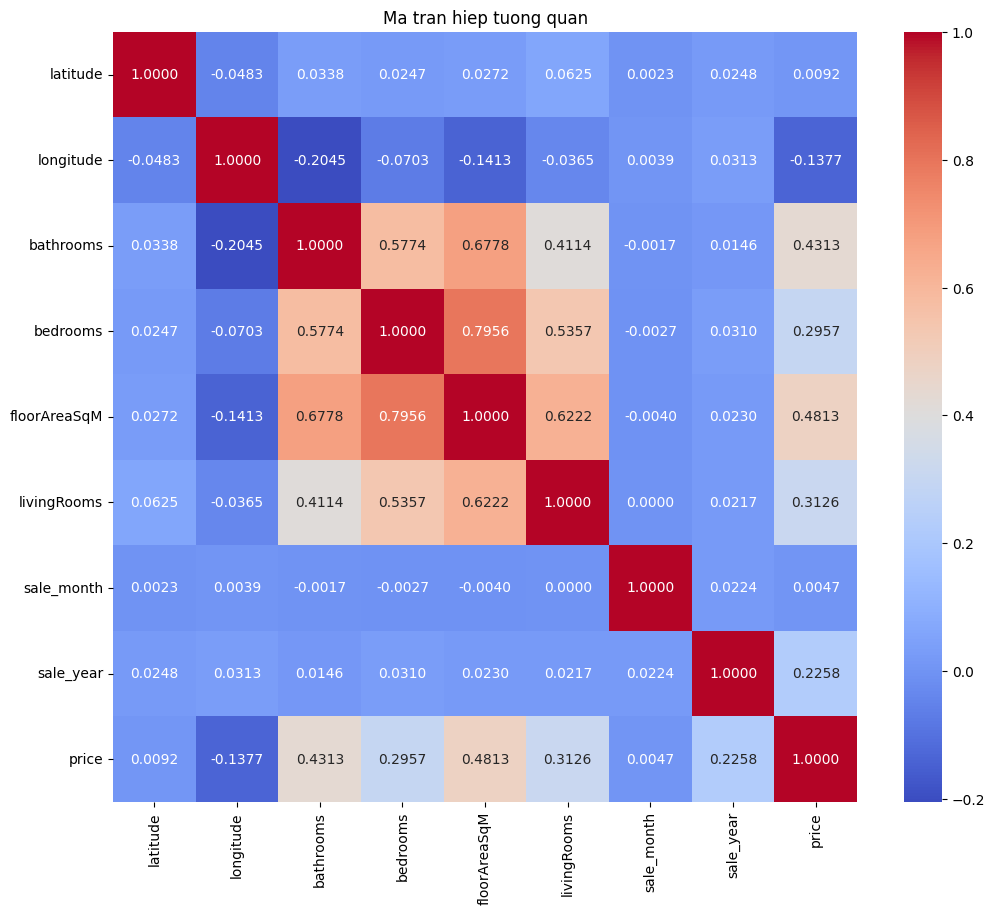

In [11]:
numeric_features = [col for col in df_train.select_dtypes(include=['number']).columns if col != 'ID']
correlation_matrix = df_train[numeric_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Ma tran hiep tuong quan')
plt.show()


Các đặc trưng livingRooms, bathrooms, bedrooms có hệ số tương quan lớn đến floorAreaSqM và đến lẫn nhau, với bedrooms là ảnh hưởng nhất -> Nhà có diện tích càng lớn thì càng nhiều phòng mỗi loại. Khi một loại phòng có giá trị lớn thì có xu hướng các phòng kia cũng có giá trị lớn.

Các cột floorAreaSqM, Bathrooms, LivingRoooms, sale_year, ID hay bedrooms có hệ số tương quan với price lớn.

Trong các feature chỉ có longtitude là có hệ số tương quan âm với price (-0,14)

Trong khi 3 cột latitude, sale_month có sự tương quan đến các loại giá trị số kia rất nhỏ.

#### So sánh các feature, output


In [12]:
# num_features = df_train.select_dtypes(include='number').drop(columns=['price', 'ID'], errors='ignore').columns
# n = len(num_features)
# total_plots = (n * (n - 1)) // 2
# cols = 3
# rows = (total_plots + cols - 1) // cols

# fig, ax = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
# ax = ax.flatten()

# plot_idx = 0
# for i in range(n):
#     for j in range(i + 1, n):
#         sns.scatterplot(data=df_train, x=num_features[i], y=num_features[j], ax=ax[plot_idx], alpha=0.3)
#         ax[plot_idx].set_title(f'{num_features[i]} vs {num_features[j]}')
#         plot_idx += 1


# plt.tight_layout()
# plt.suptitle("Feature-Feature", fontsize=16, y=1.02)
# plt.show()

* Số phòng các loại được bán trong mỗi tháng gần như tương đương.
* Bathrooms, bedrooms, livingRooms không có sự thay đổi tuyến tính.
* latitude - longitude phân bố khá đồng đều với các feature khác.
* Số lượng phòng (livingRooms, bathrooms, ...) có xu hướng tỉ lệ thuận với diện tích.
* Các căn nhà có số lượng phòng mỗi loaị lớn thường ở trung tâm (ở giữa longitude, latitude)
* Diện tích căn nhà được bán có xu hướng tăng theo thời gian
* Nhà ở trung tâm thường to hơn.

In [13]:
# import math
# num_features = df_train.select_dtypes(include='number').drop(columns=['price', 'ID', 'log_price'], errors='ignore').columns
# cols = 3
# rows = math.ceil(len(num_features) / cols)

# fig, ax = plt.subplots(rows, cols, figsize=(15, 5 * rows))
# ax = ax.flatten()

# for i, col in enumerate(num_features):
#     sns.scatterplot(data=df_train, x=col, y='price', ax=ax[i], alpha=0.3)
#     ax[i].set_title(f'{col} vs Price')

# plt.tight_layout()
# plt.suptitle("Feature - Output", fontsize=18, y=1.02)
# plt.show()

* Giá nhà có xu hướng tăng sau từng năm.
* Những địa điểm tại trung tâm thành phố (longitude và latitude ở giữa) thường có giá nhà cao hơn.
* Giá nhà có xu hướng tăng theo diện tích.

In [14]:
# df_train['sale_time'] = df_train['sale_year'] + (df_train['sale_month'] - 1) / 12
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=df_train, x='sale_time', y='price', estimator='mean', ci=None, color='blue')
# plt.title('Price - Time (M/Y)')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.tight_layout()
# plt.show()


Giá nhà có xu hướng tăng theo thời gian và có sự biến động mạnh.

Giai đoạn tăng ổn định (1995–2016):
+ Tăng dân số & nhu cầu nhà ở: Dân cư đô thị tăng, nhu cầu cao hơn cung.

+ Lãi suất thấp: Dễ vay tiền mua nhà → cầu tăng.

+ Đầu tư nước ngoài: London là trung tâm tài chính toàn cầu.

Giai đoạn biến động mạnh (2016 trở đi):

+ Brexit (2016): Anh rời liên minh châu Âu
+ Chính sách siết thuế BĐS.
+ Đại dịch COVID-19 (2020–2021).
+ Lạm phát & lãi suất tăng (2022–2023).

In [15]:
# cat_cols = ['tenure', 'currentEnergyRating']
# num_cols = ['bedrooms', 'bathrooms', 'livingRooms', 'sale_month', 'longitude', 'latitude']

# n_plots = len(cat_cols) * len(num_cols)
# n_cols = 2
# n_rows = (n_plots + 1) // n_cols
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
# axes = axes.flatten()

# plot_idx = 0
# for cat in cat_cols:
#     for num in num_cols:
#         ax = axes[plot_idx]
#         count_data = df_train.groupby([cat, num]).size().reset_index(name='count')
#         count_data['log_count'] = np.log10(count_data['count'])
#         sns.barplot(data=count_data, x=num, y='log_count', hue=cat, ax=ax)
#         ax.set_title(f"log10(count) theo {num} và {cat}")
#         ax.set_ylabel("log10(count)")
#         plot_idx += 1

# plt.tight_layout()
# plt.show()


- Sử dụng log10(count) để dễ quan sát.
* Leasehold và Freehold chiếm phần lớn số lượng phòng và cả số lượng bán ra mỗi tháng, hai cột kia thấp hơn.
* Chủ yếu Freehold có số lượng phòng tăng.
* Các rating phổ biến nhất là C, D, E và B;
* Khi số lượng phòng tăng thì rating cao giảm mạnh.
* Sale month không ảnh hưởng nhiều đến energy rating

In [16]:
# df_train['log_price'] = np.log10(df_train['price'])

# cat_cols = ['tenure', 'currentEnergyRating', 'propertyType']
# num_cols = ['log_price', 'floorAreaSqM', 'sale_year']
# fig, axes = plt.subplots(len(cat_cols), len(num_cols), figsize=(5 * (len(num_cols) + 2), 5 * len(cat_cols)))

# for i, cat_col in enumerate(cat_cols):
#     for j, num_col in enumerate(num_cols):
#         ax = axes[i, j]
#         sns.violinplot(data=df_train, x=cat_col, y=num_col, scale='width', ax=ax)
#         ax.set_title(f"{num_col} theo {cat_col}")
#         ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

# plt.tight_layout()
# plt.show()

--- Theo tenure
* log_price: `Freehold` và `Shared` có giá trung bình cao hơn `Leasehold` và `Feudal`.
* floorArea: `Freehold` có diện tích trung bình lớn nhất, là loại tài sản lớn (nhà nguyên căn), Leasehold/Feudal thường là căn hộ → nhỏ hơn.
* sale_year: `Freehold, Leasehold` phổ biến trong những năm gần đây, thị trường hiện đại chuộng 2 loại này.
*`Feudal, Shared` phân tán rộng từ 1990–2025, có thể do tồn tại trong cả nhà cổ hoặc chương trình nhà ở xã hội trước đây.

--- Theo currentEnergyRating
* `A` (hiệu suất năng lượng tốt nhất): có giá cao nhất.
* `F`, `G` cũng cao → bất ngờ: có thể là nhà cổ, sang trọng (chất lượng kém về năng lượng nhưng giá trị cao).
* `C`, `D` giá thấp → phổ biến, tiêu chuẩn trung bình.

* floorArea: `C`, `D`, `B` có diện tích nhỏ; còn lại khá cao

* sale_year: `A`, `B':phản ánh xu hướng xanh hoá.

* 'C', 'D', 'E', 'F' xuất hiện đều từ trước.


In [17]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Vẽ các biểu đồ countplot với log2(count) cho các cặp feature
# fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# # 1. tenur vs currentEnergyRating
# sns.countplot(data=df_train, x='tenure', hue='currentEnergyRating', ax=axes[0])
# axes[0].set_yscale('log')  # Chuyển trục y thành log scale
# axes[0].set_title('Tenure vs CurrentEnergyRating (log2(count))')

# # 2. tenure vs propertyType
# sns.countplot(data=df_train, x='tenure', hue='propertyType', ax=axes[1])
# axes[1].set_yscale('log')  # Chuyển trục y thành log scale
# axes[1].set_title('Tenure vs PropertyType (log2(count))')

# # 3. currentEnergyRating vs propertyType
# sns.countplot(data=df_train, x='currentEnergyRating', hue='propertyType', ax=axes[2])
# axes[2].set_yscale('log')  # Chuyển trục y thành log scale
# axes[2].set_title('CurrentEnergyRating vs PropertyType (log2(count))')

# plt.tight_layout()
# plt.show()


# Week 2: Data preprocessing

In [18]:
df = [df_train, df_test]

## Chỉnh sửa fullAddress
Vì feature `address` chứa các dữ liệu đã trùng lặp ở các feature khác (city, postcode,...), nên ta chỉ lọc ra tên đường cho cột dữ liệu này.

In [19]:
for X in df:
    X['street'] = X['fullAddress'].str.split(',').str[-3]
    X['street'] = X['street'].apply(lambda x: ' '.join(x.split()[1:]) if isinstance(x, str) and x.split()[0][0].isdigit() else x)
df_train['street']

,street
0,Adelina Grove
1,Cleveland Grove
2,Sanderstead Road
3,Queenswood Gardens
4,Woodlands Road
...,...
266320,Acton Street
266321,Margery Street
266322,Stukeley Street
266323,Floral Street


## Loại bỏ feature không liên quan
Dựa trên đánh giá và phân tích ở phần 1, ta loại bỏ các feature sau:
+ ID: Là định danh cho các dòng, không mang ý nghĩa gì cho việc train.
+ country: Chỉ mang một giá trị duy nhất (England) nên được coi là hằng số cho tất cả
+ postcode: Vì số lượng giá trị phân biệt rất lớn (bằng 1/5 lượng dữ liệu), nhãn có số lượng lớn nhất cũng chỉ là 209 (khoảng 1/1200 dữ liệu) nên ta quyết định loại bỏ cột này để tránh overfitting, ta sử dụng feature `outcode` có sự phân bố tổng quát hơn (outcode là phần đầu của postcode).
+ fullAddress: đã lọc ra tên đường (cột `street`)

In [20]:
for X in df:
  X.drop(columns=['country', 'postcode', 'fullAddress'], inplace=True)
  print(X.columns)

df[0].drop(columns=['ID'], inplace=True)

Index(['ID', 'outcode', 'latitude', 'longitude', 'bathrooms', 'bedrooms',
       'floorAreaSqM', 'livingRooms', 'tenure', 'propertyType',
       'currentEnergyRating', 'sale_month', 'sale_year', 'price', 'street'],
      dtype='object')
Index(['ID', 'outcode', 'latitude', 'longitude', 'bathrooms', 'bedrooms',
       'floorAreaSqM', 'livingRooms', 'tenure', 'propertyType',
       'currentEnergyRating', 'sale_month', 'sale_year', 'street'],
      dtype='object')


## Xử lý việc thiếu dữ liệu

In [21]:
missing_percent = df_train.isnull().mean().sort_values(ascending=False) * 100
print("Thiếu dữ liệu với mỗi cột:\n", round(missing_percent,2))

Thiếu dữ liệu với mỗi cột:
 currentEnergyRating    21.33
bathrooms              18.20
livingRooms            13.91
bedrooms                9.33
floorAreaSqM            5.18
tenure                  2.15
propertyType            0.19
longitude               0.00
outcode                 0.00
latitude                0.00
sale_month              0.00
sale_year               0.00
price                   0.00
street                  0.00
dtype: float64


### propertyType, tenure
- Vì phần trăm dữ liệu bị thiếu ít, ta thực hiện chiến thuật điền theo giá trị xuất hiện nhiều nhất

In [22]:
for X in df:
  most_common_property = X['propertyType'].mode()[0]
  X['propertyType'].fillna(most_common_property, inplace=True)
  most_common_tenure = X['tenure'].mode()[0]
  X['tenure'].fillna(most_common_tenure, inplace=True)

### livingRooms
- Feature này thiếu đến 13.91% dữ liệu, và lại có đến 65% dữ liệu có giá trị là 1, ta thực hiện điền giá trị bị thiếu là giá trị trung vị của feature này.
- Chiến thuật khác: Điền theo floorAreaSqm vì độ tương quan 2 feature này khá cao (0.62)


In [23]:
for X in df:
  X['livingRooms1'] = X['livingRooms']
  median_value = X['livingRooms1'].median()
  X['livingRooms1'].fillna(median_value, inplace=True)

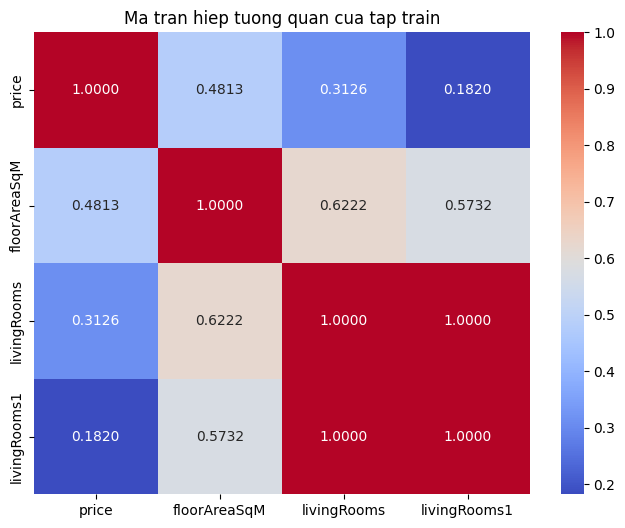

In [24]:
numeric_features = ['price', 'floorAreaSqM', 'livingRooms', 'livingRooms1']
correlation_matrix = df_train[numeric_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Ma tran hiep tuong quan cua tap train')
plt.show()

for X in df:
  X['livingRooms'] = X['livingRooms1']
  X = X.drop(columns=['livingRooms1'])

### floorAreaSqM dựa trên bedrooms, bathrooms, livingrooms
- Nhận thấy `floorAreaSqM` và `[bedrooms, bathrooms, livingRooms]` có độ tương quan cao, ta thực hiện dự đoán `floorAreaSqM` dựa trên `[bedrooms, bathrooms, livingRooms]` bằng Linear Regression.
- Với các mẫu có đủ 3 feature `[bedrooms, bathrooms, livingRooms]`, ta đoán bằng Linear Regression
- Với các mẫu thiếu ít nhất 1 feature, ta thực hiện đoán theo trên `['tenure']`. Ta lấy giá trị phần nguyên xuất hiện nhiều nhất để gáns (vì theo tìm hiểu, nhà ở London đa số có diện tích theo tiêu chuẩn chung)


In [25]:
from sklearn.linear_model import LinearRegression

for X in df:
  X_clean = X.dropna(subset=['bathrooms', 'bedrooms', 'livingRooms', 'floorAreaSqM'])
  X2 = X_clean[['bathrooms', 'bedrooms', 'livingRooms']]
  y = X_clean['floorAreaSqM']

  model = LinearRegression()
  model.fit(X2, y)

  mask_missing_target = X['floorAreaSqM'].isna()
  mask_full_features = X[['bathrooms', 'bedrooms', 'livingRooms']].notna().all(axis=1)
  mask_predictable = mask_missing_target & mask_full_features

  X_missing = X.loc[mask_predictable, ['bathrooms', 'bedrooms', 'livingRooms']]
  X.loc[mask_predictable, 'floorAreaSqM'] = model.predict(X_missing)


In [26]:
for X in df:
  missing_mask = X['floorAreaSqM'].isna()
  grouped_modes = (
      X
      .dropna(subset=['floorAreaSqM'])  # Bỏ NA để tránh lỗi
      .assign(floorAreaRounded=lambda df: df['floorAreaSqM'].round())
      .groupby('tenure')['floorAreaRounded']
      .agg(lambda x: x.mode().iloc[0])
  )
  def fill_from_group_mode(row):
      if pd.isna(row['floorAreaSqM']):
          return float(grouped_modes.loc[row['tenure']])
      return row['floorAreaSqM']

  X['floorAreaSqM'] = X.apply(fill_from_group_mode, axis=1)


### bedrooms, bathrooms
- Vì tương quan cao so với floorAreaSqM, ta dự đoán dựa trên gom nhóm floorAreaSqM.
- Chiến thuật khác: Dùng Linear Regression

In [27]:
for X in df:
  X['area_bin'] = pd.cut(X['floorAreaSqM'], bins=10)
  bedroom_mode_by_bin = (
      X
      .dropna(subset=['bedrooms'])  # loại NaN
      .groupby('area_bin')['bedrooms']
      .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
  )

  X['bedrooms'] = X.apply(
      lambda row: bedroom_mode_by_bin[row['area_bin']] if pd.isna(row['bedrooms']) else row['bedrooms'],
      axis=1
  )
  bathroom_mode_by_bin = (
      X
      .dropna(subset=['bathrooms'])
      .groupby('area_bin')['bathrooms']
      .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
  )

  X['bathrooms'] = X.apply(
      lambda row: bathroom_mode_by_bin[row['area_bin']] if pd.isna(row['bathrooms']) else row['bathrooms'],
      axis=1
  )

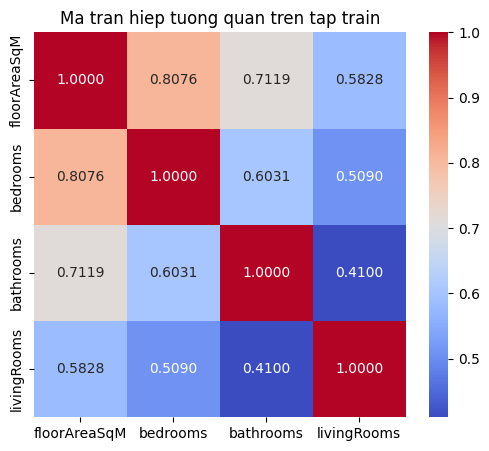

In [28]:
numeric_features = ['floorAreaSqM', 'bedrooms', 'bathrooms', 'livingRooms']
correlation_matrix = df_train[numeric_features].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Ma tran hiep tuong quan tren tap train')
plt.show()

### currentEneryRating
- Như phân tích ở trên, `currentEneryRating` phụ thuộc khá lớn vào `sale_year`, năm xây dựng càng gần với hiện tại thì khả năng tối ưu hóa năng lượng sẽ tốt hơn lúc xây nhà, Anh cũng đã có nhiều chính sách cho việc xây nhà tiết kiệm năng lượng hơn qua thời gian.
- Ngoài ra `currentEneryRating` cũng phụ thuộc vào diện tích và các phòng, tức là `floorAreaSqM`, `bedrooms`, `bathrooms`, `livingRooms`
- Ngoài ra loại nhà (`propertyType`) cũng ảnh hưởng khá nhiều
- Ta có thể dùng RandomForest để phân loại cho currentEneryRating

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

for i, X in enumerate(df):
  # 1. Chia thành 2 phần: có và không có currentEnergyRating
  X_rating_known = X[X['currentEnergyRating'].notnull()].copy()
  X_rating_missing = X[X['currentEnergyRating'].isnull()].copy()

  # 2. Encode target (rating)
  le = LabelEncoder()
  X_rating_known['energy_encoded'] = le.fit_transform(X_rating_known['currentEnergyRating'])

  # 3. Chọn features phù hợp để dự đoán
  features = ['floorAreaSqM', 'bedrooms', 'bathrooms', 'livingRooms', 'sale_year', 'propertyType']

  # Encode 'propertyType'
  X_combined = pd.concat([X_rating_known[features], X_rating_missing[features]])
  X_combined = pd.get_dummies(X_combined, columns=['propertyType'])

  X_known = X_combined.iloc[:len(X_rating_known)]
  X_missing = X_combined.iloc[len(X_rating_known):]
  y_known = X_rating_known['energy_encoded']

  # 4. Huấn luyện mô hình
  clf = RandomForestClassifier(n_estimators=100, random_state=42)
  clf.fit(X_known, y_known)

  # 5. Dự đoán giá trị thiếu
  y_missing_pred = clf.predict(X_missing)
  X_rating_missing['currentEnergyRating'] = le.inverse_transform(y_missing_pred)

  # 6. Kết hợp lại
  X_complete = pd.concat([X_rating_known.drop(columns='energy_encoded'), X_rating_missing], axis=0)

  # Cập nhật lại DataFrame chính
  X = X_complete.sort_index()
  df[i] = X

### Kiểm tra lại

In [30]:
for i, X in enumerate(df):
  missing_percent = X.isnull().mean().sort_values(ascending=False) * 100
  print("Thiếu dữ liệu với mỗi cột:\n", round(missing_percent,2))

Thiếu dữ liệu với mỗi cột:
 outcode                0.0
latitude               0.0
longitude              0.0
bathrooms              0.0
bedrooms               0.0
floorAreaSqM           0.0
livingRooms            0.0
tenure                 0.0
propertyType           0.0
currentEnergyRating    0.0
sale_month             0.0
sale_year              0.0
price                  0.0
street                 0.0
livingRooms1           0.0
area_bin               0.0
dtype: float64
Thiếu dữ liệu với mỗi cột:
 ID                     0.0
outcode                0.0
latitude               0.0
longitude              0.0
bathrooms              0.0
bedrooms               0.0
floorAreaSqM           0.0
livingRooms            0.0
tenure                 0.0
propertyType           0.0
currentEnergyRating    0.0
sale_month             0.0
sale_year              0.0
street                 0.0
livingRooms1           0.0
area_bin               0.0
dtype: float64


## Xử lý Outlier

### Price
Vì price có sự phân bố rộng (1e4 - 1e8), mà phần lớn giá trị tập trung mạnh ở khoảng 1e5-1e6 (khoảng nhỏ, lệch trái). Ta sẽ xử lý điều này bằng cách biến đổi thành log(price+1)

In [31]:
df_train['price'] = np.log1p(df_train['price'])
df = [df_train, df_test]
df[0]['price'].head()

,price
0,11.251574
1,11.407521
2,10.985310
3,10.849357
4,11.058811


### floorAreaSqM
Tương tự price, ta biến đổi log_transform

In [32]:
for i, X in enumerate(df):
  X['floorAreaSqM'] = np.log1p(X['floorAreaSqM'])
  df[i] = X

df_train[['floorAreaSqM']]

,floorAreaSqM
0,4.394449
1,4.709530
2,4.442651
3,4.290459
4,4.653960
...,...
266320,4.430817
266321,4.248495
266322,3.931826
266323,4.875197


### bedrooms, bathrooms, livingRooms

In [33]:
columns = ['livingRooms', 'bedrooms', 'bathrooms']
for i, X in enumerate(df):
  for col in columns:
    print(f"\nPhân bố phần trăm giá trị trong cột '{col}':")
    percent = X[col].value_counts(normalize=True).sort_index() * 100
    print(percent.round(2).astype(str) + " %")
  df[i] = X


Phân bố phần trăm giá trị trong cột 'livingRooms':
livingRooms
1.0    79.39 %
2.0    16.96 %
3.0     2.96 %
4.0     0.52 %
5.0     0.12 %
6.0     0.03 %
7.0     0.01 %
8.0      0.0 %
9.0      0.0 %
Name: proportion, dtype: object

Phân bố phần trăm giá trị trong cột 'bedrooms':
bedrooms
1.0    22.35 %
2.0    37.37 %
3.0    23.05 %
4.0    11.27 %
5.0     4.45 %
6.0     1.19 %
7.0     0.22 %
8.0     0.07 %
9.0     0.02 %
Name: proportion, dtype: object

Phân bố phần trăm giá trị trong cột 'bathrooms':
bathrooms
1.0    68.85 %
2.0    24.65 %
3.0     4.91 %
4.0     1.15 %
5.0     0.27 %
6.0     0.12 %
7.0     0.04 %
8.0     0.01 %
9.0     0.01 %
Name: proportion, dtype: object

Phân bố phần trăm giá trị trong cột 'livingRooms':
livingRooms
1.0    77.92 %
2.0    18.31 %
3.0     3.11 %
4.0     0.51 %
5.0     0.11 %
6.0     0.03 %
7.0     0.02 %
Name: proportion, dtype: object

Phân bố phần trăm giá trị trong cột 'bedrooms':
bedrooms
1.0    19.34 %
2.0    38.16 %
3.0    25.57 %
4.0    11.07 

Nhận thấy các outlier của các feature này chiếm số lượng khá nhỏ, ta tiến hành gom nhóm lại các giá trị có phần trăm nhỏ.

In [34]:
for i, X in enumerate(df):
  X['livingRooms'] = np.where(X['livingRooms'] >= 3, 4, X['livingRooms'])
  X['bedrooms'] = np.where(X['bedrooms'] >= 5, 6, X['bedrooms'])
  X['bathrooms'] = np.where(X['bathrooms'] >= 3, 4, X['bathrooms'])
  df[i] = X

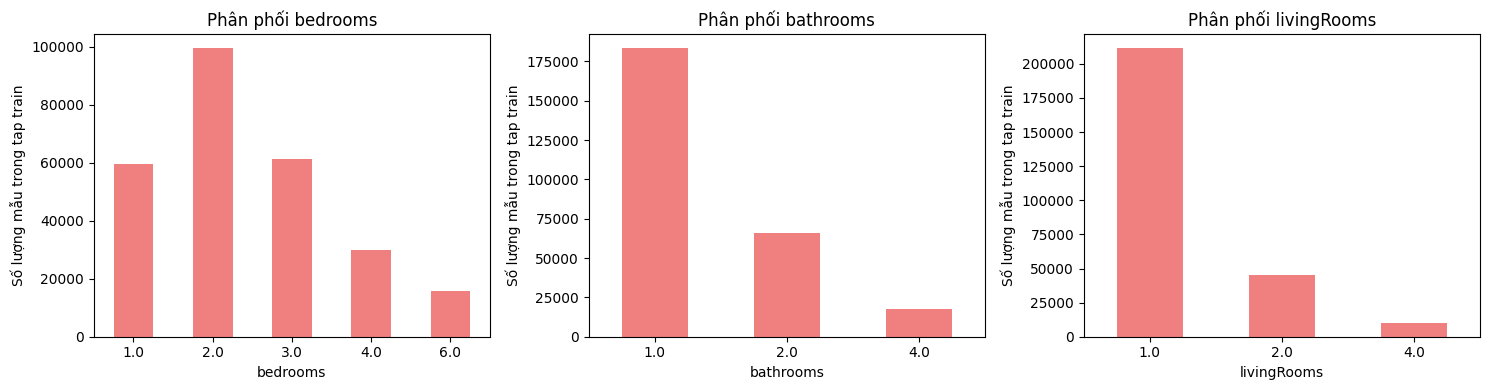

In [35]:
cols = ['bedrooms', 'bathrooms', 'livingRooms']
plt.figure(figsize=(15, 4))

for i, col in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    df_train[col].value_counts().sort_index().plot(kind='bar', color='lightcoral')
    plt.title(f'Phân phối {col}')
    plt.ylabel('Số lượng mẫu trong tap train')
    plt.xlabel(col)
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


### propertyType

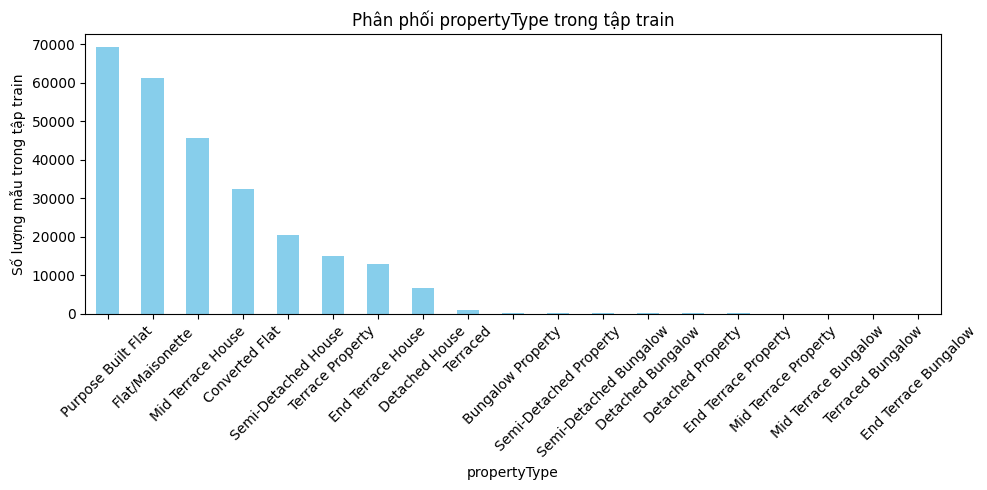

In [36]:
plt.figure(figsize=(10, 5))
df_train['propertyType'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Phân phối propertyType trong tập train')
plt.ylabel('Số lượng mẫu trong tập train')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Nhận thấy số lượng mẫu của các nhãn từ `terraced` trở xuống có lượng rất nhỏ, ta thực hiện gom nhóm chúng lại thành một nhãn mới

In [37]:
for i, X in enumerate(df):
  property_counts = X['propertyType'].value_counts()
  small_types = property_counts[property_counts <= 1000].index
  X['propertyType'] = X['propertyType'].apply(lambda x: 'others' if x in small_types else x)
  df[i] = X

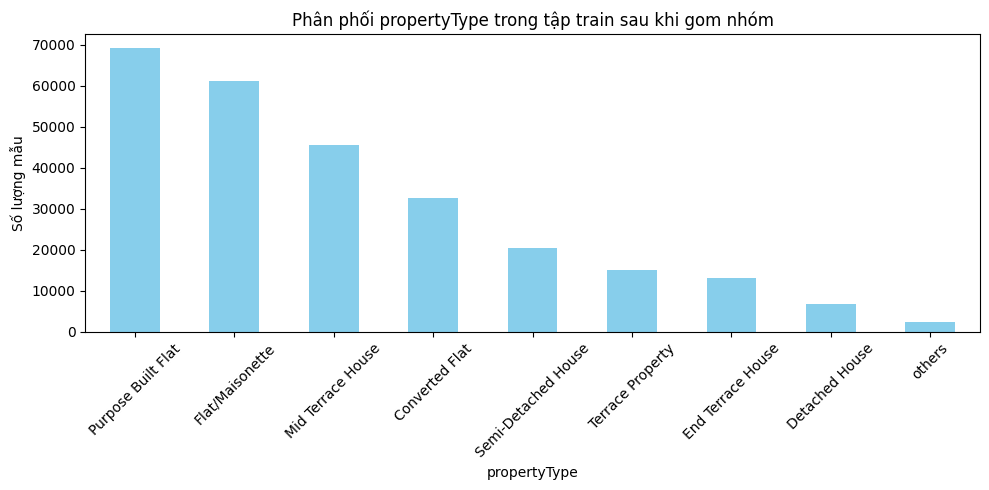

In [38]:
plt.figure(figsize=(10, 5))
df_train['propertyType'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Phân phối propertyType trong tập train sau khi gom nhóm')
plt.ylabel('Số lượng mẫu')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### currentEnergyRating

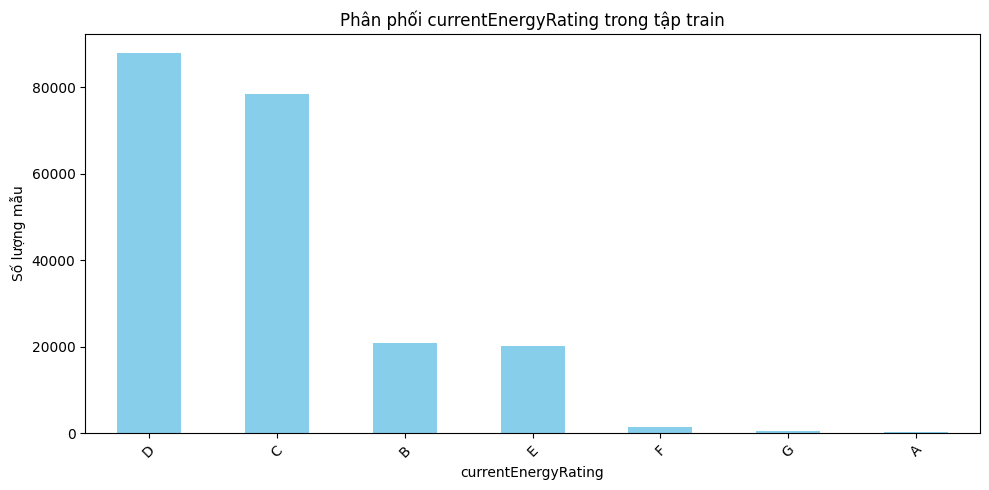

In [39]:
plt.figure(figsize=(10, 5))
df_train['currentEnergyRating'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Phân phối currentEnergyRating trong tập train')
plt.ylabel('Số lượng mẫu')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Nhận thấy nhãn dữ liệu A, G, F có số lượng nhỏ, ta thực hiện gom nhóm theo các nhóm liên quan A-B, C, D, E-F-G

In [40]:
def group_energy(rating):
    if rating in ['A', 'B']:
        return 'AB'
    elif rating == 'C':
        return 'C'
    elif rating == 'D':
        return 'D'
    else:
        return 'EFG'
for X in df:
  X['currentEnergyRating'] = X['currentEnergyRating'].apply(group_energy)

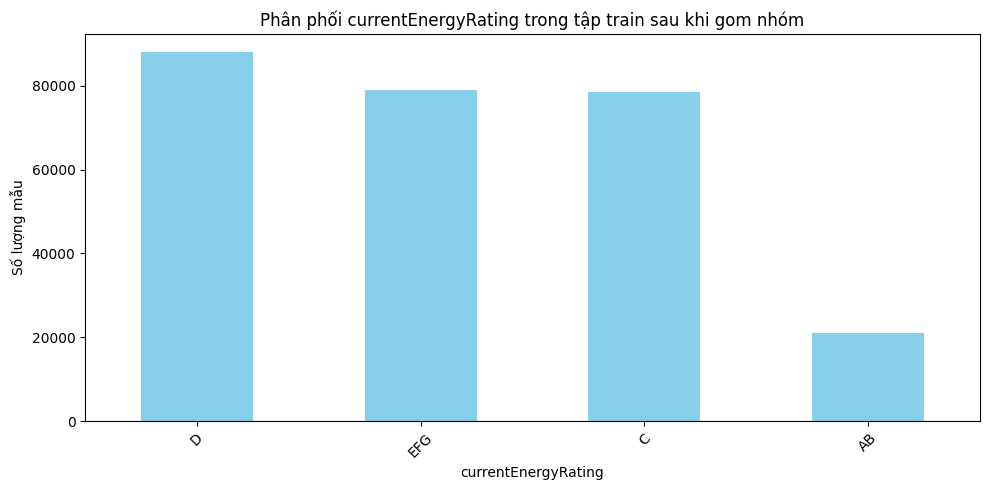

In [41]:
plt.figure(figsize=(10, 5))
df_train['currentEnergyRating'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Phân phối currentEnergyRating trong tập train sau khi gom nhóm')
plt.ylabel('Số lượng mẫu')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Kiểm tra lại

In [42]:
missing_percent = df_train.isnull().mean().sort_values(ascending=False) * 100
print("Thiếu dữ liệu với mỗi cột trong tập train:\n", round(missing_percent,2))

missing_percent = df_test.isnull().mean().sort_values(ascending=False) * 100
print("Thiếu dữ liệu với mỗi cột trong tập test:\n", round(missing_percent,2))

Thiếu dữ liệu với mỗi cột trong tập train:
 outcode                0.0
latitude               0.0
longitude              0.0
bathrooms              0.0
bedrooms               0.0
floorAreaSqM           0.0
livingRooms            0.0
tenure                 0.0
propertyType           0.0
currentEnergyRating    0.0
sale_month             0.0
sale_year              0.0
price                  0.0
street                 0.0
livingRooms1           0.0
area_bin               0.0
dtype: float64
Thiếu dữ liệu với mỗi cột trong tập test:
 ID                     0.0
outcode                0.0
latitude               0.0
longitude              0.0
bathrooms              0.0
bedrooms               0.0
floorAreaSqM           0.0
livingRooms            0.0
tenure                 0.0
propertyType           0.0
currentEnergyRating    0.0
sale_month             0.0
sale_year              0.0
street                 0.0
livingRooms1           0.0
area_bin               0.0
dtype: float64


## Labeling

Ta thực hiện label các feature dạng objects như `outcode`, `propertyType`, `tenure`, `currentEnergyRating`, `street`, `sale_year`, `sale_month`.

Với feature `latitude` và `longtitude` ta cũng cần labeling để đưa dữ liệu trở nên có ý nghĩa tuyến tính hơn.

### currentEneryRating
Có 4 nhãn AB, C, D, EFG. Vì currentEnergyRating có ý nghĩa về thứ tự rõ ràng.

Phương án 1: Sử dụng Ordinal Encoding. (AB - 4, C - 3, D - 2, EFG - 1)

In [43]:
# Ánh xạ ordinal
ordinal_map = {
    'AB': 4,
    'C': 3,
    'D': 2,
    'EFG': 1
}
df_train['currentEnergyRating'] = df_train['currentEnergyRating'].map(ordinal_map)
df_test['currentEnergyRating'] = df_test['currentEnergyRating'].map(ordinal_map)
# for i in range(len(df)):
#     df[i] = pd.get_dummies(df[i], columns=['currentEnergyRating'], prefix='currentEnergyRating', drop_first=True)

# Gán lại
df = [df_train, df_test]

### tenure
Vì số lượng nhãn nhỏ (4) và các nhãn khá balanced, ta thực hiện one-hot labeling trên feature này.

In [44]:
for i in range(len(df)):
    df[i] = pd.get_dummies(df[i], columns=['tenure'], prefix='tenure', drop_first=True)

# Gán lại
df_train, df_test = df

In [45]:
df_train

,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,propertyType,currentEnergyRating,sale_month,sale_year,price,street,livingRooms1,area_bin,tenure_Freehold,tenure_Leasehold,tenure_Shared
0,E1,51.519406,-0.053261,1.0,3.0,4.394449,1.0,Semi-Detached House,3,1,1995,11.251574,Adelina Grove,1.0,"(65.061, 120.122]",True,False,False
1,E1,51.521261,-0.053384,2.0,4.0,4.709530,1.0,Terrace Property,2,1,1995,11.407521,Cleveland Grove,1.0,"(65.061, 120.122]",False,True,False
2,E10,51.569054,-0.034892,1.0,3.0,4.442651,1.0,Terrace Property,2,1,1995,10.985310,Sanderstead Road,1.0,"(65.061, 120.122]",True,False,False
3,E11,51.564212,0.026292,1.0,2.0,4.290459,1.0,Purpose Built Flat,1,1,1995,10.849357,Queenswood Gardens,1.0,"(65.061, 120.122]",False,True,False
4,E11,51.563430,0.006260,1.0,3.0,4.653960,1.0,Mid Terrace House,2,1,1995,11.058811,Woodlands Road,1.0,"(65.061, 120.122]",True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266320,WC1X,51.528933,-0.116113,2.0,2.0,4.430817,1.0,Flat/Maisonette,1,12,2023,13.592368,Acton Street,1.0,"(65.061, 120.122]",False,True,False
266321,WC1X,51.527292,-0.112005,1.0,2.0,4.248495,1.0,Converted Flat,3,12,2023,13.217675,Margery Street,1.0,"(65.061, 120.122]",False,True,False
266322,WC2B,51.516084,-0.123581,1.0,2.0,3.931826,1.0,Purpose Built Flat,3,12,2023,13.500801,Stukeley Street,1.0,"(9.449, 65.061]",False,True,False
266323,WC2E,51.511861,-0.125419,2.0,2.0,4.875197,1.0,Flat/Maisonette,4,12,2023,15.001829,Floral Street,1.0,"(120.122, 175.184]",False,True,False


### propertyType
- Chiến thuật 1 - weights1: Gán trọng số các loại nhà theo dữ liệu tham khảo từ trên mạng -> tránh overfitting
- Chiến thuật 2 - weights: Gán trọng số các loại nhà theo scale từ avg value của tập train.

In [46]:
weights1 = {
    'Purpose Built Flat': 1.0,
    'Flat/Maisonette': 1.5,
    'Converted Flat': 2.0,
    'Mid Terrace House': 2.5,
    'Terrace Property': 2.5,
    'End Terrace House': 3.0,
    'Semi-Detached House': 4.5,
    'Detached House': 10.0,
    'others': 4.0
}


In [47]:
from sklearn.preprocessing import MinMaxScaler
avg_price_by_type = df_train.groupby('propertyType')['price'].mean()

# Scale về [1, N], với loại rẻ nhất có trọng số = 1
scaler = MinMaxScaler(feature_range=(1, 10))
scaled_weights = scaler.fit_transform(avg_price_by_type.values.reshape(-1, 1)).flatten()
weights2 = dict(zip(avg_price_by_type.index, scaled_weights))

weights2


{'Converted Flat': np.float64(1.3473797443527218),
 'Detached House': np.float64(10.0),
 'End Terrace House': np.float64(4.45319935439187),
 'Flat/Maisonette': np.float64(4.4048201998577525),
 'Mid Terrace House': np.float64(4.769814255174438),
 'Purpose Built Flat': np.float64(1.0),
 'Semi-Detached House': np.float64(6.601542678964876),
 'Terrace Property': np.float64(5.85962014757628),
 'others': np.float64(5.878273131955098)}

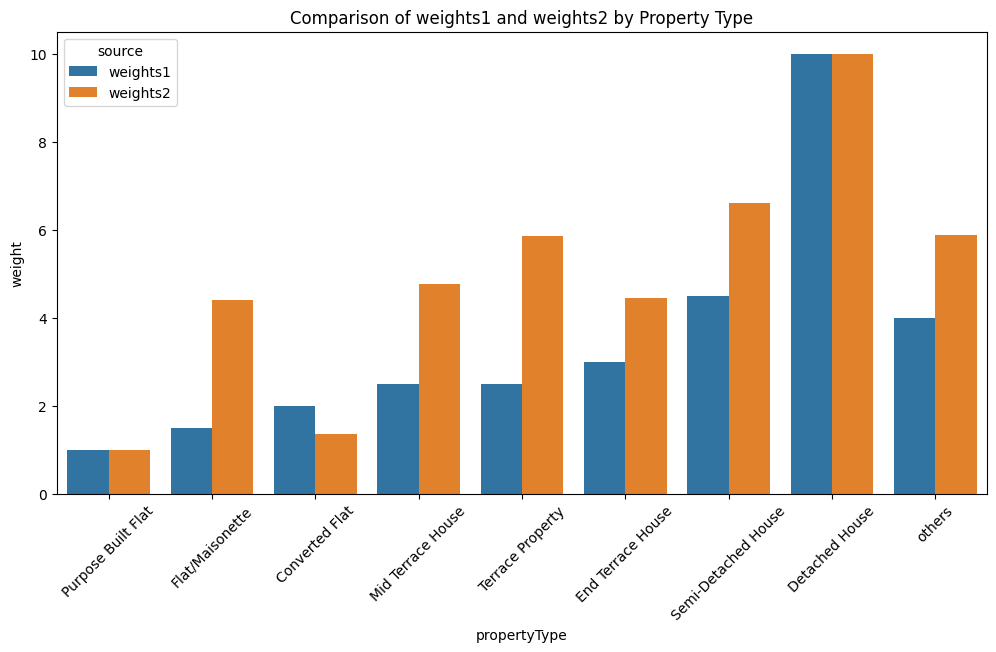

In [48]:
df_weights1 = pd.DataFrame(list(weights1.items()), columns=['propertyType', 'weight'])
df_weights1['source'] = 'weights1'
df_weights2 = pd.DataFrame(list(weights2.items()), columns=['propertyType', 'weight'])
df_weights2['source'] = 'weights2'
df_combined = pd.concat([df_weights1, df_weights2])


plt.figure(figsize=(12, 6))
sns.barplot(data=df_combined, x='propertyType', y='weight', hue='source')
plt.title('Comparison of weights1 and weights2 by Property Type')
plt.xticks(rotation=45)
plt.show()

In [49]:
# Dùng weights1
for i, X in enumerate(df):
  X['propertyType'] = X['propertyType'].map(weights1)
  print(X[['propertyType']].head())
  df[i] = X

   propertyType
0           4.5
1           2.5
2           2.5
3           1.0
4           2.5
   propertyType
0           1.5
1           1.0
2           1.5
3           1.0
4           1.5


### street
- Mỗi con đường thường chỉ có một vài kiểu nhà phổ biến (loại nhà, quy mô, khu dân cư...), do đó có thể phản ánh phần nào mức giá điển hình.

- Ta sử dụng giá nhà theo median theo từng con đường để gán nhãn cho cột street, giúp học được nhà đặc trưng tại con đường đó đồng thời hạn chế outlier

In [50]:
len(df_train['street'].unique())

18889

In [51]:
from sklearn.preprocessing import StandardScaler

# Đổi median thành mean
mean_price = df_train.groupby('street')['price'].mean()

# Ánh xạ giá trị trung bình vào cột street
df_train['street'] = df_train['street'].map(mean_price)
df_test['street'] = df_test['street'].map(mean_price)

# Điền giá trị trung bình chung nếu bị NaN
mean_value = df_train['street'].mean()
df_train['street'].fillna(mean_value, inplace=True)
df_test['street'].fillna(mean_value, inplace=True)

# Nếu cần scale
# scaler = StandardScaler()
# df_train['street'] = scaler.fit_transform(df_train[['street']])
# df_test['street'] = scaler.transform(df_test[['street']])

df_train[['street']].head()


,street
0,12.394130
1,11.916378
2,12.479338
3,12.124996
4,12.884320


# Week 3: Feature Engineering

## longitude latitude
- Ta thực hiện label longitude và latitude:
+ Như đã phân tích, ở London có 5 quận có giá nhà trung bình cao hơn khu vực xung quanh, ta label 2 cột thành khoảng cách nhỏ nhất đến 1 trong các quận.

- **Ý tưởng sơ khai đến nâng cấp Toán cho ý tưởng**
  - Ý tưởng ở trên liên quan đến euclid là một phép đo phổ biển và cơ bản trong Toán học. Ở đây vị trí được biểu diễn bằng vĩ độ, tung độ trên trái đất nên việc dùng euclid sẽ không chính xác, thậm chí là phi vật lý.
  - Điều ta cần phải quan tâm khi đã biết vĩ độ, tung độ là hình cầu với bán R của trái đất, độ dẹt của trái đất.
- **Phương pháp chính ta sẽ dùng:**
  - Geodesic distance (hàm geodesic của geopy) tính đường “đại vòng” trên mặt cầu, chính xác hơn Euclid.
  - Dựng mô hình Trái Đất là ellipsoid (WGS‑84: a = 6 378 137 m, f ≈ 1/298.257223563).
  - Tính đường ngắn nhất (geodesic) trên ellipsoid này bằng các thuật toán như Vincenty hoặc Karney (GeographicLib).
  - Độ chính xác cao (mm–cm), ổn định ở cả xích đạo lẫn vùng cực.
- **Tóm tắt các bước:**
  - Geodesic distance (hàm geodesic của geopy) tính đường “đại vòng” trên mặt cầu, chính xác hơn Euclid.

  - Lấy 5 quận trọng yếu và tọa độ trung tâm đại diện.

  - Tính khoảng cách từ mỗi căn nhà đến từng quận.

  - Train LinearRegression trên 5 cột khoảng cách để dự đoán price, thu được hệ số βᵢ.

  - Đổi thành trọng số wᵢ = -βᵢ, rồi chuẩn hóa sao cho trọng số nhỏ nhất = 1.

  - Với mỗi căn, tính scoreᵢ = distᵢ * wᵢ và chọn giá trị score nhỏ nhất trong các quận, gán vào cột min_dist_weight.

In [52]:
import pandas as pd
import numpy as np

# Tạo bin (chia thành 10 phần) cho cả latitude và longitude
lat_bins = pd.cut(df_train['latitude'], bins=10, retbins=True)[1]
lon_bins = pd.cut(df_train['longitude'], bins=10, retbins=True)[1]

# Tạo nhãn bin cho train
df_train['lat_bin'] = pd.cut(df_train['latitude'], bins=lat_bins, labels=False, include_lowest=True)
df_train['lon_bin'] = pd.cut(df_train['longitude'], bins=lon_bins, labels=False, include_lowest=True)

# Tính giá trung bình theo bin
bin_avg_price = (
    df_train.groupby(['lat_bin', 'lon_bin'])['price']
    .mean()
    .reset_index()
    .rename(columns={'price': 'bin_avg_price'})
)

# Gán nhãn cho train
df_train = df_train.merge(bin_avg_price, on=['lat_bin', 'lon_bin'], how='left')

# Tạo nhãn bin cho test dùng bins của train
df_test['lat_bin'] = pd.cut(df_test['latitude'], bins=lat_bins, labels=False, include_lowest=True)
df_test['lon_bin'] = pd.cut(df_test['longitude'], bins=lon_bins, labels=False, include_lowest=True)

# Gán nhãn bin_avg_price vào test từ train
df_test = df_test.merge(bin_avg_price, on=['lat_bin', 'lon_bin'], how='left')

# Với bin mới chưa xuất hiện ở train, điền bằng giá trung bình tổng thể
df_test['bin_avg_price'].fillna(df_train['bin_avg_price'].mean(), inplace=True)

# Xoá cột không cần thiết
df_train.drop(columns=['latitude', 'longitude', 'lat_bin', 'lon_bin'], inplace=True)
df_test.drop(columns=['latitude', 'longitude', 'lat_bin', 'lon_bin'], inplace=True)

In [53]:
# !pip install geopy --quiet
# from geopy.distance import geodesic

# # Cell 4: Định nghĩa tọa độ trung tâm 5 quận và tính khoảng cách geodesic
# district_centers = {
#     'Kensington and Chelsea': (51.4941, -0.1945),
#     'Westminster': (51.4975, -0.1357),
#     'Camden': (51.5416, -0.1432),
#     'Islington': (51.5380, -0.1022),
#     'Richmond upon Thames': (51.4479, -0.3210),
#     'Hammersmith and Fulham': (51.4927, -0.2339),
#     'Barnet': (51.6252, -0.1517),
#     'Hackney': (51.5450, -0.0550),
# }

# # Với mỗi quận, thêm cột distance (km)
# for name, coord in district_centers.items():
#     col = f'dist_{name.replace(" ", "_")}'
#     df[0][col] = df[0].apply(lambda r: geodesic((r.latitude, r.longitude), coord).km, axis=1)
#     df[1][col]  = df[1].apply(lambda r: geodesic((r.latitude, r.longitude), coord).km, axis=1)


In [54]:
# # Cell 5: Train Linear Regression để lấy hệ số trên các khoảng cách
# X_train = df[0][[f'dist_{n.replace(" ", "_")}' for n in district_centers]]
# y_train = df[0]['price']

# lr = LinearRegression(fit_intercept=True)
# lr.fit(X_train, y_train)

# # Sau khi đã lr.fit(...)
# coeffs = lr.coef_                        # mảng β_i, có thể âm hoặc dương
# importance = np.abs(coeffs)             # importance_i = |β_i|, luôn ≥0

# # Nếu có hệ số đúng bằng 0, thêm epsilon để tránh chia cho 0
# epsilon = 1e-8
# importance = np.where(importance == 0, epsilon, importance)

# # Chuẩn hóa để quận ít quan trọng nhất (importance nhỏ nhất) có weight = 1
# min_imp = importance.min()
# weights = min_imp / importance         # weight_i = min_imp / importance_i

# # Tạo dict name → weight
# weight_dict = dict(zip(district_centers.keys(), weights))

# # Cell 6 (mới): Tính giá trị min(distance * weight) cho mỗi hàng
# def compute_min_score(row, centers, weights):
#     # Tạo list các score = distance_quận_i * weight_quận_i
#     scores = [
#         row[f"dist_{name.replace(' ', '_')}"] * weights[name]
#         for name in centers
#     ]
#     # Trả về giá trị nhỏ nhất
#     return min(scores)

# # Áp dụng cho cả train & test, lưu vào cột mới 'min_dist_weight'
# df[0]['min_dist_weight'] = df[0].apply(
#     compute_min_score,
#     axis=1,
#     centers=district_centers,
#     weights=weight_dict
# )

# df[1]['min_dist_weight'] = df[1].apply(
#     compute_min_score,
#     axis=1,
#     centers=district_centers,
#     weights=weight_dict
# )
# for d in [df[0], df[1]]:
#     d.drop(columns=['latitude', 'longitude'], inplace=True)
#     dist_cols = [col for col in d.columns if col.startswith('dist_')]
#     d.drop(columns=dist_cols, inplace=True)

- **Đánh giá trọng số theo từng quận**

  1. **Southwark (weight = 0.026)**  
    - **Model:** Quận quan trọng nhất (weight nhỏ nhất).  
    - **Thực tế:**  
      - Trung tâm London Bridge, South Bank, Borough Market.  
      - Hạ tầng Jubilee/Northern Line rất phát triển.  
      - Các dự án Bankside/Waterloo thúc đẩy giá nhà tăng mạnh.

  2. **Westminster (weight = 0.036)**  
    - **Model:** Quận quan trọng thứ hai.  
    - **Thực tế:**  
      - Trung tâm hành chính–du lịch (Buckingham, Abbey, Parliament).  
      - Hạ tầng Metro & bus dày đặc.  
      - Giá nhà cao nhất London, lan toả “premium” ra vùng xung quanh.

  3. **Tower Hamlets (weight = 0.065)**  
    - **Model:** Quận quan trọng thứ ba.  
    - **Thực tế:**  
      - Khu tài chính Canary Wharf, DLR, Elizabeth Line.  
      - Chuỗi chung cư cao cấp và văn phòng mới.  
      - Phát triển đô thị nhanh, hút đầu tư quốc tế.

  4. **Camden (weight = 0.146)**  
    - **Model:** Quận quan trọng thứ tư.  
    - **Thực tế:**  
      - Camden Market, Regent’s Park, Northern Line.  
      - Mix nhà xã hội & cao cấp, du lịch đông.  
      - Ảnh hưởng giá không đồng đều, ít đột biến hơn.

  5. **Islington (weight = 1.000)**  
    - **Model:** Quận ít quan trọng nhất (weight lớn nhất).  
    - **Thực tế:**  
      - Khu dân cư truyền thống (Angel, Upper Street).  
      - Giá trung bình ở mức trung bình (~£500k).  
      - Ít dự án quy hoạch lớn, ảnh hưởng lan toả ổn định.

- **Các fearture cần thiết**
  - Hiện tại ta sử dụng "min_dist_weight". Nhưng bên cạnh đó có 3 feartures khác mà ta có thể thêm vào để train mô hình:
    - min_dist_weight bắt được quận ảnh hưởng mạnh nhất.
    - sum_dist_weight đo tổng mức độ gần/quán xuyến.
    - IDW_potential phản ánh tổng lực hút không gian, tập trung vào khoảng cách nhỏ.
  - Tương lai, ta có thể thêm bớt, lấy subset của 3 feartures trên để nhằm huấn luyện mô hình ra kết quả tốt nhất!.

## outcode
Đây là cột có ảnh hưởng lớn đến giá nhà vì nó thể hiện được giá trị bất động sản tại mỗi vùng.

Chiến thuật: Ta sử dụng dữ liệu bên ngoài thực tế để label lại cho cột dữ liệu này

Chiến thuật 2: Label theo median giá nhà.

In [55]:
# print all unique value of df_train["outcode"]
df_train["outcode"].unique()

array(['E1', 'E10', 'E11', 'E13', 'E14', 'E15', 'E17', 'E18', 'E3', 'E4',
       'E5', 'E7', 'E8', 'EC1Y', 'EC2Y', 'EC4A', 'N10', 'N11', 'N12',
       'N13', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N2', 'N20',
       'N21', 'N22', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'NW1', 'NW10',
       'NW11', 'NW2', 'NW3', 'NW4', 'NW5', 'NW6', 'NW7', 'NW8', 'SE1',
       'SE10', 'SE11', 'SE12', 'SE13', 'SE14', 'SE15', 'SE16', 'SE17',
       'SE18', 'SE19', 'SE2', 'SE20', 'SE21', 'SE23', 'SE24', 'SE25',
       'SE26', 'SE27', 'SE28', 'SE3', 'SE4', 'SE5', 'SE6', 'SE7', 'SE9',
       'SW10', 'SW11', 'SW12', 'SW13', 'SW14', 'SW15', 'SW16', 'SW17',
       'SW18', 'SW19', 'SW1E', 'SW1P', 'SW1V', 'SW1X', 'SW1Y', 'SW2',
       'SW3', 'SW4', 'SW5', 'SW6', 'SW7', 'SW8', 'W10', 'W11', 'W12',
       'W13', 'W14', 'W1B', 'W1D', 'W1F', 'W1H', 'W1J', 'W1K', 'W1W',
       'W2', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'WC1B', 'WC1H', 'WC1R',
       'WC1X', 'WC2B', 'WC2H', 'WC2N', 'E12', 'E6', 'N1', 'N3', 'NW9',
     

### Dữ liệu giá bất động sản trung bình theo 'outcode' được tham khảo từ trang "Ellis & Co"
  https://www.ellisandco.co.uk/guides/buying/london-property-prices-postcode/
  
  Trang web cung cấp giá nhà trung bình tại London theo từng mã bưu chính (postcode) như 'E1', 'N1', 'SW1X', v.v.


In [56]:
avg_price_by_outcode = {
    'E1': 518931,
    'E2': 511527,
    'E3': 458971,
    'E4': 447763,
    'E5': 589863,
    'E6': 350124,
    'E7': 426400,
    'E8': 602990,
    'E9': 541092,
    'E10': 444525,
    'E11': 509895,
    'E12': 415993,
    'E13': 382300,
    'E14': 545606,
    'E15': 411224,
    'E16': 447381,
    'E17': 490380,
    'E18': 491651,
    'N1': 766791,
    'N2': 819933,
    'N3': 621632,
    'N4': 566875,
    'N5': 787482,
    'N6': 977235,
    'N7': 558457,
    'N8': 659062,
    'N9': 324420,
    'N10': 750770,
    'N11': 521258,
    'N12': 607489,
    'N13': 509527,
    'N14': 591234,
    'N15': 489123,
    'N16': 602345,
    'N17': 478912,
    'N18': 365789,
    'N19': 589456,
    'N20': 712345,
    'N21': 645678,
    'N22': 498765,
    'NW1': 950000,
    'NW2': 623456,
    'NW3': 1123456,
    'NW4': 678901,
    'NW5': 789012,
    'NW6': 845678,
    'NW7': 712345,
    'NW8': 5800000,
    'SE1': 750768,
    'SE2': 365432,
    'SE3': 589123,
    'SE4': 512345,
    'SE5': 498765,
    'SE6': 456789,
    'SE7': 478901,
    'SE8': 489012,
    'SE9': 501234,
    'SE10': 623456,
    'SE11': 589876,
    'SE12': 478901,
    'SE13': 512345,
    'SE14': 498765,
    'SE15': 523456,
    'SE16': 567890,
    'SE17': 534567,
    'SE18': 456789,
    'SE19': 489012,
    'SE20': 478901,
    'SE21': 589123,
    'SE22': 612345,
    'SE23': 523456,
    'SE24': 589876,
    'SE25': 456789,
    'SE26': 489012,
    'SE27': 478901,
    'SE28': 365432,
    'SW1X': 2800000,
    'SW1W': 4544936,
    'SW1E': 2300000,
    'SW1P': 2200000,
    'SW1V': 2100000,
    'SW1Y': 2400000,
    'SW2': 589123,
    'SW3': 1123456,
    'SW4': 678901,
    'SW5': 789012,
    'SW6': 845678,
    'SW7': 712345,
    'SW8': 623456,
    'SW9': 589876,
    'SW10': 678901,
    'SW11': 712345,
    'SW12': 623456,
    'SW13': 845678,
    'SW14': 789012,
    'SW15': 712345,
    'SW16': 589123,
    'SW17': 623456,
    'SW18': 678901,
    'SW19': 789012,
    'SW20': 712345,
    'W1B': 4375000,
    'W1D': 2300000,
    'W1F': 2200000,
    'W1H': 2100000,
    'W1J': 2400000,
    'W1K': 3650000,
    'W1S': 2500000,
    'W1T': 2300000,
    'W1U': 2200000,
    'W1W': 2100000,
    'W2': 845678,
    'W3': 678901,
    'W4': 789012,
    'W5': 712345,
    'W6': 623456,
    'W7': 589876,
    'W8': 1123456,
    'W9': 845678,
    'W10': 678901,
    'W11': 789012,
    'W12': 712345,
    'W13': 623456,
    'W14': 589876,
    'WC1A': 867634,
    'WC1B': 867634,
    'WC1E': 867634,
    'WC1H': 867634,
    'WC1N': 867634,
    'WC1R': 867634,
    'WC1V': 867634,
    'WC1X': 867634,
    'WC2A': 1667871,
    'WC2B': 1667871,
    'WC2E': 1667871,
    'WC2H': 1667871,
    'WC2N': 1667871,
    'WC2R': 1667871,
    'EC1A': 744055,
    'EC1M': 744055,
    'EC1N': 744055,
    'EC1R': 4300000,
    'EC1V': 744055,
    'EC1Y': 744055,
    'EC2A': 925413,
    'EC2M': 925413,
    'EC2R': 925413,
    'EC2V': 925413,
    'EC2Y': 925413,
    'EC3A': 957179,
    'EC3M': 957179,
    'EC3N': 957179,
    'EC3R': 957179,
    'EC3V': 957179,
    'EC4A': 621141,
    'EC4M': 621141,
    'EC4N': 621141,
    'EC4R': 621141,
    'EC4V': 621141,
    'EC4Y': 621141,
}


In [57]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Ánh xạ avg_price_by_outcode
for X in [df_train, df_test]:
    X['outcode'] = X['outcode'].map(avg_price_by_outcode)

# Biến đổi phi tuyến nếu cần
degree = 1  # bạn có thể thử 1.2, 2.0,...
df_train['outcode'] = df_train['outcode'] ** degree
df_test['outcode'] = df_test['outcode'] ** degree

# Fill NaN
avg_value = df_train['outcode'].mean()
df_train['outcode'].fillna(avg_value, inplace=True)
df_test['outcode'].fillna(avg_value, inplace=True)


# Tính threshold
rich_threshold = np.percentile(list(avg_price_by_outcode.values()), 80)
poor_threshold = np.percentile(list(avg_price_by_outcode.values()), 20)

# Thêm cột đặc trưng
for X in [df_train, df_test]:
    X['is_rich_area'] = (X['outcode'] >= rich_threshold).astype(int)
    X['is_poor_area'] = (X['outcode'] <= poor_threshold).astype(int)

df_train['outcode'] = np.log1p(df_train[['outcode']])
df_test['outcode'] = np.log1p(df_test[['outcode']])



## sale_year, sale_month

**1. Phương pháp chuyển đổi thời gian**  
- **Cyclical encoding**: dùng  
- $\displaystyle \text{sale_month_sin} = \sin\!\Bigl(\frac{2\pi \cdot \text{sale_month}}{12}\Bigr)$  
- $\displaystyle \text{sale_month_cos} = \cos\!\Bigl(\frac{2\pi \cdot \text{sale_month}}{12}\Bigr)$
- **Months since base**: tính số tháng kể từ mốc (ví dụ Jan 1995) để tạo biến thời gian liên tục, nắm bắt xu hướng dài hạn.  
- **Era grouping**: phân chia năm thành các giai đoạn có ý nghĩa (pre‑Brexit, post‑Brexit, Covid‑lockdown, hậu Covid) dưới dạng biến phân loại hoặc dummy.

**2. Cơ sở khoa học & thực tiễn**  
- **Cyclical encoding** giúp mô hình nhận ra mô hình mùa vụ (giá tăng mùa hè, giảm mùa đông) mà không mất đi tính tuần hoàn.  
- **Time index** (months_since_base) phục vụ cho xu hướng tổng thể (inflation, GDP), phù hợp với hồi quy tuyến tính hoặc tree‑based.  
- **Era dummy** (Brexit, Covid) phản ánh “điểm gãy” trong xu hướng, giúp mô hình điều chỉnh bước nhảy do các cú sốc kinh tế‑xã hội.

**3. Đánh dấu sự kiện Brexit & Covid‑19**  
- **Brexit**: tạo `era_brexit = 1` cho giao dịch từ 2016 trở đi, nắm bắt thay đổi tâm lý và dòng vốn.  
- **Covid‑19**: tạo `era_covid = 1` cho giao dịch từ 2020 trở đi, phản ánh phong tỏa và chính sách hỗ trợ bất động sản.  
- (Tuỳ chọn) kết hợp thành `sale_period` với 4 nhãn chi tiết hơn.

**4. Triển khai**  
- Áp dụng nhất quán trên cả `train` và `test`.  
- Tạo lần lượt:  
  1. `sale_month_sin`, `sale_month_cos`  
  2. `months_since_base`  
  3. `era_brexit`, `era_covid`  
  4. (Tuỳ chọn) `sale_period`  
- Đảm bảo tránh **data leakage** và giữ cùng logic cho cả hai tập.

**5. Ý nghĩa & khi sử dụng**  
- **`sale_month_sin/cos`**: mô hình hóa mùa vụ, hữu ích nếu có dữ liệu nhiều năm.  
- **`months_since_base`**: bắt trend dài hạn, nên dùng cho dữ liệu trải rộng.  
- **`era_brexit` / `era_covid`**: điều chỉnh bước nhảy do sự kiện lớn; cần khi phân tích giá trước/sau sự kiện.  
- **`sale_period`**: biến phân loại nhiều mức, giúp mô hình tree nhận biết các chế độ thị trường khác nhau.  

Kết hợp hợp lý các đặc trưng này giúp mô hình dự báo giá nhà vừa nắm bắt được **mùa vụ**, **xu hướng**, vừa điều chỉnh được **tác động đột biến** từ Brexit và Covid‑19.  

In [58]:
import pandas as pd
import numpy as np

# 1. Mã hóa chu kỳ cho sale_month bằng sin và cos
df_train['sale_month_sin'] = np.sin(2 * np.pi * df_train['sale_month'] / 12)
df_train['sale_month_cos'] = np.cos(2 * np.pi * df_train['sale_month'] / 12)
df_test['sale_month_sin'] = np.sin(2 * np.pi * df_test['sale_month'] / 12)
df_test['sale_month_cos'] = np.cos(2 * np.pi * df_test['sale_month'] / 12)

# 2. Tạo biến thời gian liên tục: số tháng từ mốc Jan 1995
base_year, base_month = 1995, 1  # mốc tháng 1/1995
df_train['months_since_base'] = (df_train['sale_year'] - base_year) * 12 + (df_train['sale_month'] - base_month)
df_test['months_since_base'] = (df_test['sale_year'] - base_year) * 12 + (df_test['sale_month'] - base_month)

- Ta nhận thấy cột "sale_peroid" đang là object nên ta thực hiện labeling nó lại luôn, ta dùng Ordinal Encoding cho sale_period, vì các giai đoạn này có thứ tự thời gian rõ ràng và chỉ cần một cột số duy nhất để biểu diễn (giúp giữ độ dài pipeline gọn, vẫn phản ánh được trend qua các giai đoạn).

In [59]:
# Tạo trực tiếp các flag dựa trên sale_year
# df_train['isCrisis'] = (df_train['sale_year'] <= 2007).astype(int)
# df_train['isBrexit'] = ((df_train['sale_year'] > 2015) & (df_train['sale_year'] <= 2019)).astype(int)
# df_train['isCovid'] = ((df_train['sale_year'] > 2019) & (df_train['sale_year'] <= 2021)).astype(int)

# df_test['isCrisis'] = (df_test['sale_year'] <= 2007).astype(int)
# df_test['isBrexit'] = ((df_test['sale_year'] > 2015) & (df_test['sale_year'] <= 2019)).astype(int)
# df_test['isCovid'] = ((df_test['sale_year'] > 2019) & (df_test['sale_year'] <= 2021)).astype(int)

In [60]:
df_train['trend_squared'] = df_train['months_since_base'] ** 2
df_test['trend_squared'] = df_test['months_since_base'] ** 2

df_train['trend_cubed'] = df_train['months_since_base'] ** 3
df_test['trend_cubed'] = df_test['months_since_base'] ** 3

# df_train['trend_quad'] = df_train['months_since_base'] ** 4
# df_test['trend_quad'] = df_test['months_since_base'] ** 4

In [61]:
df_train.drop(columns=['sale_month', 'sale_year'], inplace=True)
df_test.drop(columns=['sale_month', 'sale_year'], inplace=True)


In [62]:
# scaler = StandardScaler()
# df_train[['months_since_base', 'trend_squared', 'trend_cubed', 'trend_quad']] = scaler.fit_transform(
#     df_train[['months_since_base', 'trend_squared', 'trend_cubed', 'trend_quad']]
# )

# df_test[['months_since_base', 'trend_squared', 'trend_cubed', 'trend_quad']] = scaler.transform(
#     df_test[['months_since_base', 'trend_squared', 'trend_cubed', 'trend_quad']]
# )

## Thêm bớt feature
- Các feature không cần thiết đã loại bỏ ở week 2.

In [63]:
df_train.drop(columns=['livingRooms1', 'area_bin'], inplace=True)
df_test.drop(columns=['livingRooms1', 'area_bin'], inplace=True)
df_train.columns


Index(['outcode', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms',
       'propertyType', 'currentEnergyRating', 'price', 'street',
       'tenure_Freehold', 'tenure_Leasehold', 'tenure_Shared', 'bin_avg_price',
       'is_rich_area', 'is_poor_area', 'sale_month_sin', 'sale_month_cos',
       'months_since_base', 'isCrisis', 'isBrexit', 'isCovid', 'trend_squared',
       'trend_cubed'],
      dtype='object')

### Loại bỏ đặc trưng có tương quan cao

In [64]:
# # Chỉ giữ các cột số (float, int) để tính tương quan
# numeric_cols = X.select_dtypes(include=['number'])
# numeric_cols
# corr_matrix = numeric_cols.corr().abs()

# upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# # Xác định các cột có tương quan cao > 0.8
# to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.8)]

# # Xoá các cột đó khỏi X
# df_train.drop(to_drop, axis=1, inplace=True)
# df_test.drop(to_drop, axis=1, inplace=True)

In [65]:
df_train.columns

Index(['outcode', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms',
       'propertyType', 'currentEnergyRating', 'price', 'street',
       'tenure_Freehold', 'tenure_Leasehold', 'tenure_Shared', 'bin_avg_price',
       'is_rich_area', 'is_poor_area', 'sale_month_sin', 'sale_month_cos',
       'months_since_base', 'isCrisis', 'isBrexit', 'isCovid', 'trend_squared',
       'trend_cubed'],
      dtype='object')

In [66]:
df_test.columns

Index(['ID', 'outcode', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms',
       'propertyType', 'currentEnergyRating', 'street', 'tenure_Freehold',
       'tenure_Leasehold', 'tenure_Shared', 'bin_avg_price', 'is_rich_area',
       'is_poor_area', 'sale_month_sin', 'sale_month_cos', 'months_since_base',
       'isCrisis', 'isBrexit', 'isCovid', 'trend_squared', 'trend_cubed'],
      dtype='object')

#  Dùng các mô hình máy học

### Random Forest

In [67]:
df_train.dropna(subset=['price'], inplace=True)

X_train = df_train.drop(columns=['price'])
y_train = df_train['price']
X_test = df_test.drop(columns=['ID'])

print(y_train.isnull().sum())

rf_params = {'RandomForestRegressor__max_depth': None, 'RandomForestRegressor__min_samples_split': 2, 'RandomForestRegressor__n_estimators': 600}

0


In [68]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
rf_pipeline = Pipeline([
    ('RandomForestRegressor', RandomForestRegressor(random_state=42))
])

rf_pipeline.set_params(**rf_params)
rf_pipeline.fit(X_train, y_train)
y_test_pred_rf = rf_pipeline.predict(X_test)
y_test_pred_rf_original_scale = np.expm1(y_test_pred_rf)
print("\nPredictions on test set using RandomForestRegressor with specified parameters:")
print(y_test_pred_rf_original_scale[:10])


Predictions on test set using RandomForestRegressor with specified parameters:
[363539.3850501  351299.90164069 297336.30262288 345535.3146954
 362236.00304905 976006.45946185 342577.36503164 460439.82332451
 292028.79651632 392251.43610932]


In [69]:
submission_rf_specific = pd.DataFrame({'ID': df_test['ID'], 'price': y_test_pred_rf_original_scale})
submission_rf_specific.to_csv('submission_randomforest_specific_params.csv', index=False)

print("\nSubmission file 'submission_randomforest_specific_params.csv' created.")


Submission file 'submission_randomforest_specific_params.csv' created.


###Neural Network
Một phương án khác là ta có thể dùng Neural Network cho bài toán này.

In [ ]:
# Cài đặt thư viện nếu chưa có
!pip install tensorflow

import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# ======== 1. Chuẩn bị dữ liệu ========

# Giả định bạn đã có df_train và df_test
X_train = df_train.drop(columns=['price'])
y_train = df_train['price']

X_test = df_test.drop(columns=['ID'])
test_ids = df_test['ID']

# Chuẩn hóa
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======== 2. Xây dựng mô hình ========
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile mô hình với MAE (Mean Absolute Error)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')

# Callback dừng sớm nếu loss không giảm
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# ======== 3. Huấn luyện mô hình ========
model.fit(
    X_train_scaled, y_train,
    epochs=10,
    batch_size=64,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/10
4162/4162 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 1.1925
Epoch 2/10
4162/4162 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.2777
Epoch 3/10
4162/4162 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.2608
Epoch 4/10
4162/4162 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.2585
Epoch 5/10
4162/4162 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.2551
Epoch 6/10
4162/4162 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.2531
Epoch 7/10
4162/4162 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.2508
Epoch 8/10
4162/4162 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.2515
Epoch 9/10
4162/4162 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.2496
Epoch 10/10
4162/4162 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.2503


Hoặc ta có thể dùng một số mô hình Regressor như Xgboost


In [ ]:
# Dự đoán
y_pred = model.predict(X_test_scaled).flatten()

y_pred = np.expm1(y_pred)

# Tạo submission file
submission = pd.DataFrame({'ID': test_ids, 'price': y_pred})
submission.to_csv('ok.csv', index=False)

518/518 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## XgBoost, catboost, voting, ....




In [ ]:
!pip install lightgbm catboost xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [ ]:
df_train.columns

Index(['outcode', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms',
       'propertyType', 'currentEnergyRating', 'price', 'street',
       'tenure_Freehold', 'tenure_Leasehold', 'tenure_Shared', 'bin_avg_price',
       'is_rich_area', 'is_poor_area', 'months_since_base', 'isCrisis',
       'isBrexit', 'isCovid', 'trend_squared', 'trend_cubed', 'trend_quad'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


In [ ]:
X_train = df_train.drop(columns=['price'])
y_train = df_train['price']
X_test = df_test.drop(columns=['ID'])

# Khởi tạo mô hình
model = {
    'Ridge': TransformedTargetRegressor(
        regressor=Pipeline([
            ('Scaler', StandardScaler()),
            ('Model', Ridge())
        ]),
        func=None,
        inverse_func=None
    ),
    # 'XGBRegressor': TransformedTargetRegressor(
    #     regressor=XGBRegressor(),
    #     func=None,
    #     inverse_func=None
    # ),
    'LightGBM': TransformedTargetRegressor(
        regressor=LGBMRegressor(random_state=42),
        func=None,
        inverse_func=None
    ),
    # 'ElasticNet': TransformedTargetRegressor(
    #     regressor=ElasticNet(),
    #     func=None,
    #     inverse_func=None
    # ),
    # 'HistGradientBoosting': TransformedTargetRegressor(
    #     regressor=HistGradientBoostingRegressor(random_state=42),
    #     func=None,
    #     inverse_func=None
    # )
}

params_grid = {
    'Ridge': {
        'regressor__Model__alpha': [10, 100, 200, 300, 250],
        'regressor__Model__solver': ['auto', 'cholesky', 'lsqr', 'saga']
    },
    # 'XGBRegressor': {
    #     'regressor__n_estimators': [100, 300],
    #     'regressor__max_depth': [5, 7],
    #     'regressor__learning_rate': [0.05, 0.1, 0.2]
    # },
    'LightGBM': {
        'regressor__n_estimators': [100, 200],
        'regressor__learning_rate': [0.05, 0.1],
        'regressor__max_depth': [-1, 5, 10]
    },
    # 'ElasticNet': {
    #     'regressor__alpha': [0.1, 1, 10],
    #     'regressor__l1_ratio': [0.1, 0.5, 0.9]
    # },
    # 'HistGradientBoosting': {
    #     'regressor__max_iter': [100, 300],
    #     'regressor__max_depth': [None, 10],
    #     'regressor__learning_rate': [0.05, 0.1]
    # }
}

# Lưu mô hình tốt nhất
best_model = {}

# Grid search
for name, pipeline in model.items():
    print(f"\n--- Huấn luyện mô hình: {name} ---")
    grid_search = GridSearchCV(
        pipeline,
        param_grid=params_grid[name],
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)
    best_model[name] = grid_search.best_estimator_
    print(f"Best params: {grid_search.best_params_}")
    print(f"Best score (MAE): {-grid_search.best_score_:.4f}")


--- Huấn luyện mô hình: Ridge ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params: {'regressor__Model__alpha': 100, 'regressor__Model__solver': 'lsqr'}
Best score (MAE): 0.2756

--- Huấn luyện mô hình: LightGBM ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1458
[LightGBM] [Info] Number of data points in the train set: 266325, number of used features: 22
[LightGBM] [Info] Start training from score 12.840213
Best params: {'regressor__learning_rate': 0.1, 'regressor__max_depth': -1, 'regressor__n_estimators': 200}
Best score (MAE): 0.3068


In [ ]:
sorted_models = sorted(best_model.items(), key=lambda x: -x[1].score(X_train, y_train))  # hoặc x[1].best_score_
top_models = sorted_models[:2]
model_chosens = [(name, model) for name, model in top_models]

combine_model = VotingRegressor(estimators = model_chosens)
combine_model.fit(X_train, y_train)
test_ids = df_test['ID']
y_pred = combine_model.predict(X_test)

y_pred = np.expm1(y_pred)

submission = pd.DataFrame({'ID': test_ids, 'price': y_pred})
submission.to_csv('submissionn.csv', index=False)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1458
[LightGBM] [Info] Number of data points in the train set: 266325, number of used features: 22
[LightGBM] [Info] Start training from score 12.840213
